<a href="https://colab.research.google.com/github/EbubeObioma/EbubeObioma/blob/main/FantasyFootballClusterAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fantasy Football Cluster Analysis
In this project, I will be analyzing the valuation of players based on last season's performance, in order to identify players of different potentials for each season. This will help us to understand the players performance patterns and fantasy returns and to determine the exact price to set for each player at the start of the new season.

In [ ]:
#importing the necessary libraries and mounting google drive for file storage and retrieval.
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) #setting the limits of columns and rows displayed

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Python for Data/fpl_data.csv')#reading the dataset

In [ ]:
data #viewing the entire dataset

Player_Name                      Club  \
0                        Alex Runnarsson                   Arsenal   
1                    Alexandre Lacazette                   Arsenal   
2                             Bernd Leno                   Arsenal   
3                            Bukayo Saka                   Arsenal   
4                         Calum Chambers                   Arsenal   
5                          Cedric Soares                   Arsenal   
6                        Daniel Ceballos                   Arsenal   
7                             David Luiz                   Arsenal   
8                         Edward Nketiah                   Arsenal   
9                       Emile Smith Rowe                   Arsenal   
10                     Gabriel Maghalaes                   Arsenal   
11      Gabriel Teodoro Martinelli Silva                   Arsenal   
12                          Granit Xhaka                   Arsenal   
13                       Hector Bellerin                   Arsenal   
14                        Kieran Tierney                   Arsenal   
15                       Martin Odegaard                   Arsenal   
16                            Matt Macey                   Arsenal   
17                          Miguel Azeez                   Arsenal   
18         Mohamed Naser El Sayed Elneny                   Arsenal   
19                          Nicolas Pepe                   Arsenal   
20                            Pablo Mari                   Arsenal   
21             Pierre-Emerick Aubameyang                   Arsenal   
22                          Reiss Nelson                   Arsenal   
23                           Rob Holding                   Arsenal   
24                        Sead Kolasinac                   Arsenal   
25                      Shkodran Mustafi                   Arsenal   
26             Sokratis Papastathopoulos                   Arsenal   
27                         Thomas Partey                   Arsenal   
28                        William Saliba                   Arsenal   
29               Willian Borges Da Silva                   Arsenal   
30                     Ahmed El Mohamady               Aston Villa   
31                        Anwar El Ghazi               Aston Villa   
32                       Bertrand Traore               Aston Villa   
33                    Carney Chukwuemeka               Aston Villa   
34                       Conor Hourihane               Aston Villa   
35          Douglas Luiz Soares de Paulo               Aston Villa   
36                     Emiliano Martinez               Aston Villa   
37                      Ezri Konsa Ngoyo               Aston Villa   
38                        Henri Lansbury               Aston Villa   
39                         Jack Grealish               Aston Villa   
40                          Jacob Ramsey               Aston Villa   
41                Jaden Philogene-Bidace               Aston Villa   
42                           John McGinn               Aston Villa   
43                Jose Peleteiro Romallo               Aston Villa   
44                          Keinan Davis               Aston Villa   
45                         Kortney Hause               Aston Villa   
46          Mahmoud Ahmed Ibrahim Hassan               Aston Villa   
47                     Marvelous Nakamba               Aston Villa   
48                          Matt Targett               Aston Villa   
49                          Matthew Cash               Aston Villa   
50                         Morgan Sanson               Aston Villa   
51                         Ollie Watkins               Aston Villa   
52                          Orjan Nyland               Aston Villa   
53                          Ross Barkley               Aston Villa   
54                          Tyrone Mings               Aston Villa   
55                         Wesley Moraes               Aston Villa   
56                        Aaron Connoll

In [ ]:
data.shape #Viewing the number of rows and columns

(476, 13)

# Observation
The dataframe has 476 rows and 13 columns.

In [ ]:
data.info() #Checking the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player_Name     476 non-null    object 
 1   Club            476 non-null    object 
 2   Position        476 non-null    object 
 3   Goals_Scored    476 non-null    int64  
 4   Assists         476 non-null    int64  
 5   Total_Points    476 non-null    int64  
 6   Minutes         476 non-null    int64  
 7   Goals_Conceded  476 non-null    int64  
 8   Creativity      476 non-null    float64
 9   Influence       476 non-null    float64
 10  Threat          476 non-null    int64  
 11  Bonus           476 non-null    int64  
 12  Clean_Sheets    476 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 48.5+ KB


# Observation
The dataframe has the following data types;
1. Objects: Player_Name, Club, Position
2. Integers: Goals_Scored, Assists, Total_Points, Minutes, Goals_Conceded, Threat, Bonus, Clean_Sheets
3. Floating Points: Creativity, Influence

In [ ]:
data.describe(include='all').T #seeing the summary statistics

count unique              top freq         mean          std  \
Player_Name       476    476  Alex Runnarsson    1          NaN          NaN   
Club              476     17          Arsenal   30          NaN          NaN   
Position          476      4       Midfielder  195          NaN          NaN   
Goals_Scored    476.0    NaN              NaN  NaN     1.907563     3.455562   
Assists         476.0    NaN              NaN  NaN     1.752101     2.708563   
Total_Points    476.0    NaN              NaN  NaN    58.516807    51.293559   
Minutes         476.0    NaN              NaN  NaN  1336.909664  1073.773995   
Goals_Conceded  476.0    NaN              NaN  NaN    19.157563    15.946171   
Creativity      476.0    NaN              NaN  NaN    195.97605   251.478541   
Influence       476.0    NaN              NaN  NaN   294.617647   267.779681   
Threat          476.0    NaN              NaN  NaN   224.962185   318.240377   
Bonus           476.0    NaN              NaN  NaN     4.718487     6.252625   
Clean_Sheets    476.0    NaN              NaN  NaN     4.745798     4.394312   

                min     25%     50%      75%     max  
Player_Name     NaN     NaN     NaN      NaN     NaN  
Club            NaN     NaN     NaN      NaN     NaN  
Position        NaN     NaN     NaN      NaN     NaN  
Goals_Scored    0.0     0.0     0.5      2.0    23.0  
Assists         0.0     0.0     0.0      2.0    14.0  
Total_Points    0.0    10.0    48.0    94.25   244.0  
Minutes         0.0  268.75  1269.5  2256.25  3420.0  
Goals_Conceded  0.0     4.0    18.0     31.0    68.0  
Creativity      0.0     8.3   96.95   296.95  1414.9  
Influence       0.0    46.5   233.1    499.5  1318.2  
Threat          0.0    5.75   104.5   298.25  1980.0  
Bonus           0.0     0.0     2.0      7.0    40.0  
Clean_Sheets    0.0     0.0     4.0      8.0    19.0

# Observation
The 476 rows in the dataframe give us information about 476 different players from 17 different football clubs in the league.
There are 4 diffreetn positions that each player could have but the position with the highest number of players is midfield with 195 players.
30 of the players are from Arsenal making it the clubs with the most players in our data.
The average number of goals is 1.9 with a standard deviation of 3.4. 25% of the players scored 0 goals, 75% have 2 goals and less while 50% have at least 5 goals. The most goals scored by a player during the season is 23.
The average number of assists is 1.7 with a standard deviation of 2.7. 25% of the players have 0 assists, 75% have 2 assists and less while 50% have 0 assists. The most assists by a player during the season is 14.
The players played an average of 1337 minutes with the maximum at 3420 minutes.



In [ ]:
data['Club'].value_counts()

Club
Arsenal                     30
Crystal Palace              30
Leeds United                29
West Ham United             29
Tottenham Hotspurs          29
Newcastle United            29
Leicester City              29
Manchester United           28
Chelsea                     28
Brighton and Hove Albion    28
Everton                     27
Liverpool                   27
Manchester City             27
Southampton                 27
Burnley                     27
Aston Villa                 26
Wolverhampton Wanderers     26
Name: count, dtype: int64

Showing the distribution of players per club.

In [ ]:
data['Position'].value_counts()#seeing the player positions

Position
Midfielder    195
Defender      172
Forward        64
Goalkeeper     45
Name: count, dtype: int64

Showing the distribution of players per position.

In [ ]:
data['Position'].nunique()

4

In [ ]:
data[data['Goals_Scored'] >= 15].sort_values(by='Goals_Scored', ascending=False) # Exploring players with the highest number of goals of the season.

Player_Name                Club    Position  Goals_Scored  \
403             Harry Kane  Tottenham Hotspurs     Forward            23   
269          Mohamed Salah           Liverpool  Midfielder            22   
315        Bruno Fernandes   Manchester United  Midfielder            18   
219        Patrick Bamford        Leeds United     Forward            17   
405          Heung-Min Son  Tottenham Hotspurs  Midfielder            17   
177  Dominic Calvert-Lewin             Everton     Forward            16   
238            Jamie Vardy      Leicester City     Forward            15   

     Assists  Total_Points  Minutes  Goals_Conceded  Creativity  Influence  \
403       14           242     3083              39       659.1     1318.2   
269        6           231     3077              41       825.7     1056.0   
315       14           244     3101              36      1414.9     1292.6   
219       11           194     3052              50       371.0      867.2   
405       11           228     3119              36      1049.9     1052.2   
177        6           165     2871              39       308.0      745.8   
238       14           187     2838              44       356.6      819.2   

     Threat  Bonus  Clean_Sheets  
403    1585     40            12  
269    1980     21            11  
315    1253     36            13  
219    1512     26            10  
405    1046     26            13  
177    1439     21            11  
238    1306     23             8

# Observation
Harry Kane of Tottenham Hotspurs is the highest goal scorer with 23 goals during the season followed by Mohammed Salah of Liverpool with 22 goals and thirdly Bruno Fernandes of Manchester United with 18 goals.

In [ ]:
data[data['Assists'] >= 10].sort_values(by='Assists', ascending=False) # Exploring players with assists greater than 10 during the season.

Player_Name                Club    Position  Goals_Scored  \
238           Jamie Vardy      Leicester City     Forward            15   
315       Bruno Fernandes   Manchester United  Midfielder            18   
403            Harry Kane  Tottenham Hotspurs     Forward            23   
39          Jack Grealish         Aston Villa  Midfielder             6   
136           Timo Werner             Chelsea     Forward             6   
292       Kevin De Bruyne     Manchester City  Midfielder             6   
219       Patrick Bamford        Leeds United     Forward            17   
276            Sadio Mane           Liverpool  Midfielder            11   
326       Marcus Rashford   Manchester United  Midfielder            11   
405         Heung-Min Son  Tottenham Hotspurs  Midfielder            17   
421       Aaron Cresswell     West Ham United    Defender             0   
204         Jack Harrison        Leeds United  Midfielder             8   
220  Raphael Dias Belloli        Leeds United  Midfielder             6   

     Assists  Total_Points  Minutes  Goals_Conceded  Creativity  Influence  \
238       14           187     2838              44       356.6      819.2   
315       14           244     3101              36      1414.9     1292.6   
403       14           242     3083              39       659.1     1318.2   
39        12           135     2183              28      1029.6      707.4   
136       12           128     2598              29       532.4      514.8   
292       12           141     1995              17      1170.1      760.8   
219       11           194     3052              50       371.0      867.2   
276       11           176     2808              28       809.7      808.8   
326       11           174     2917              39       682.1      793.2   
405       11           228     3119              36      1049.9     1052.2   
421       11           153     3170              41       898.6      669.4   
204       10           160     2846              45       821.7      759.2   
220       10           133     2358              34       889.3      719.6   

     Threat  Bonus  Clean_Sheets  
238    1306     23             8  
315    1253     36            13  
403    1585     40            12  
39      917     13            12  
136    1276      7            13  
292     914     19            12  
219    1512     26            10  
276    1535     14            12  
326    1127      9            12  
405    1046     26            13  
421      96     21            11  
204     666     15            11  
220     902     11             9

# Observation
Jamie Vardy of Leicester City has the highest number of assists at 14 tied by Bruno Fernandes of Manchester United and Harry Kane of Tottenham Hotspurs.  

In [ ]:
data[data['Threat'] >= 1500].sort_values(by='Threat', ascending=False) # Showing the most threatning players of the season.

Player_Name                Club    Position  Goals_Scored  Assists  \
269    Mohamed Salah           Liverpool  Midfielder            22        6   
51     Ollie Watkins         Aston Villa     Forward            14        9   
403       Harry Kane  Tottenham Hotspurs     Forward            23       14   
276       Sadio Mane           Liverpool  Midfielder            11       11   
219  Patrick Bamford        Leeds United     Forward            17       11   

     Total_Points  Minutes  Goals_Conceded  Creativity  Influence  Threat  \
269           231     3077              41       825.7     1056.0    1980   
51            168     3328              46       610.4      815.4    1721   
403           242     3083              39       659.1     1318.2    1585   
276           176     2808              28       809.7      808.8    1535   
219           194     3052              50       371.0      867.2    1512   

     Bonus  Clean_Sheets  
269     21            11  
51      18            14  
403     40            12  
276     14            12  
219     26            10

Mohammed Salad had the highest threat score and is the second highest goal scorer of the season behind Harry Kane.

In [ ]:
data.isnull().sum()#Checking for null values

Player_Name       0
Club              0
Position          0
Goals_Scored      0
Assists           0
Total_Points      0
Minutes           0
Goals_Conceded    0
Creativity        0
Influence         0
Threat            0
Bonus             0
Clean_Sheets      0
dtype: int64

There are no missing values in the dataframe.

# Univariate Analysis

In [ ]:
#importing libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

def plot_categorical_counts(data, feature, figsize=(16,5), title=None, rotation=90):
  plt.figure(figsize= figsize)

  order = data.groupby('Club')['Player_Name'].count().sort_values(ascending=False).index

  axx = sns.countplot(data=data, x=feature, order=order)
  plt.xticks(rotation=rotation)

  #  Annotate bars
  for p in axx.patches:
    axx.annotate(
        int(p.get_height()),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=10, color='black', xytext=(0,1), textcoords='offset points'
    )

  plt.title(title if title else f"Countplot of {feature}")
  plt.show()




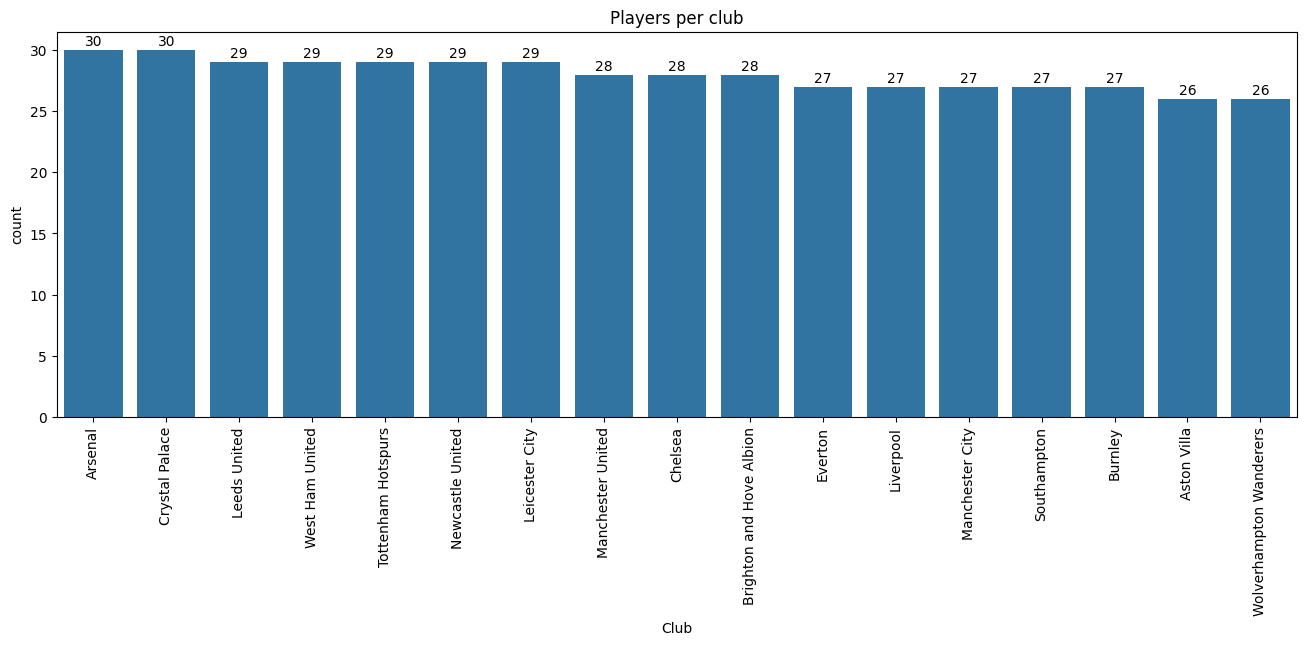

In [ ]:
plot_categorical_counts(data, 'Club', title="Players per club")

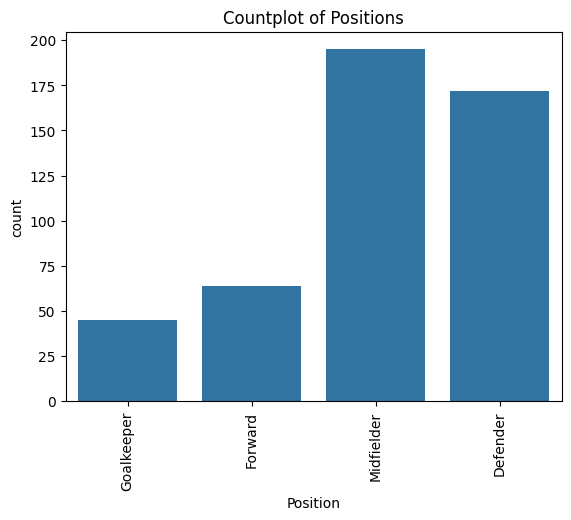

In [ ]:
sns.countplot(data=data, x='Position')
plt.xticks(rotation=90)
plt.title("Countplot of Positions")
plt.show()

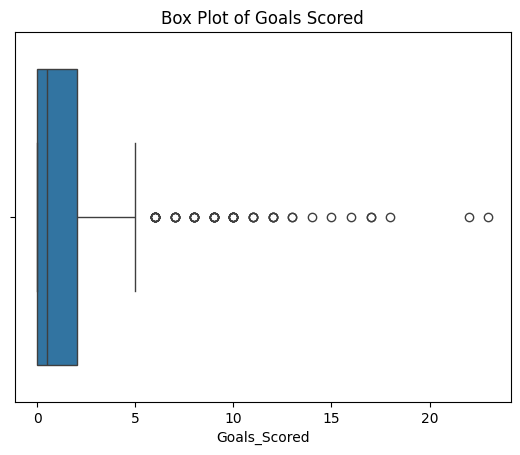

In [ ]:
sns.boxplot(x='Goals_Scored', data=data)
plt.title("Box Plot of Goals Scored")
plt.show()

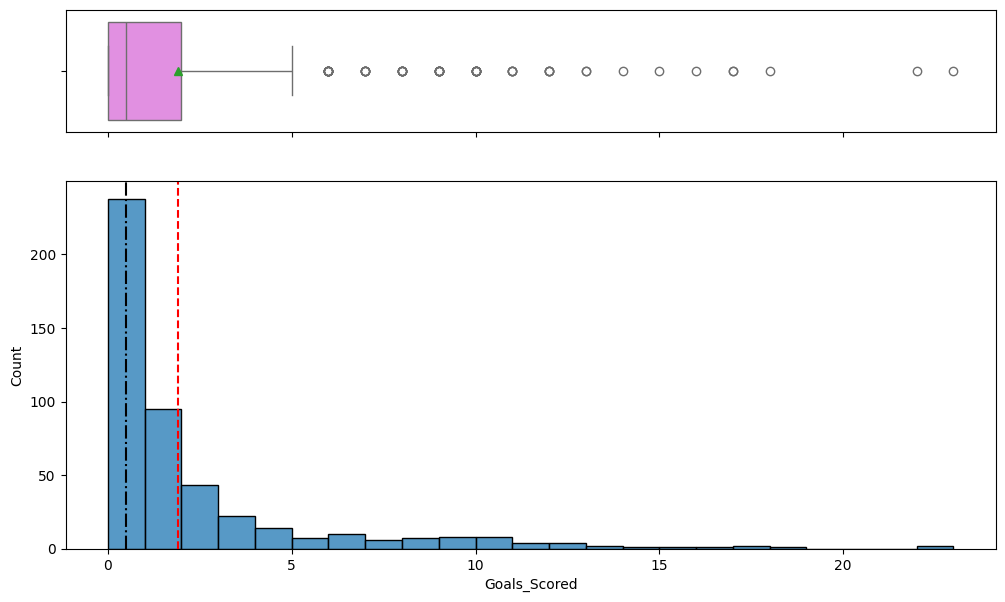

In [ ]:
fig, ax = plt.subplots(2,1,sharex=True, gridspec_kw={'height_ratios': (1,3)},figsize = (12,7))
sns.boxplot(data = data, x = 'Goals_Scored', showmeans = True, color = 'violet', ax = ax[0])
sns.histplot(data = data, x = 'Goals_Scored', bins = 23, kde = False, ax = ax[1])
ax[1].axvline(x = data['Goals_Scored'].mean(), color = 'red', linestyle = '--')
ax[1].axvline(x = data['Goals_Scored'].median(), color = 'black', linestyle = '-.')
plt.show()

In [ ]:
def histogram_boxplot_fun(data, feature, kde = False, bins = 23):
  fig, ax = plt.subplots(2,1,sharex=True, gridspec_kw={'height_ratios': (1,3)},figsize = (12,7))
  sns.boxplot(data = data, x = feature, showmeans = True, color = 'violet', ax = ax[0])
  sns.histplot(data = data, x = feature, bins = 23, kde = False, ax = ax[1])
  ax[1].axvline(x = data[feature].mean(), color = 'red', linestyle = '--')
  ax[1].axvline(x = data[feature].median(), color = 'black', linestyle = '-.')
  plt.show()

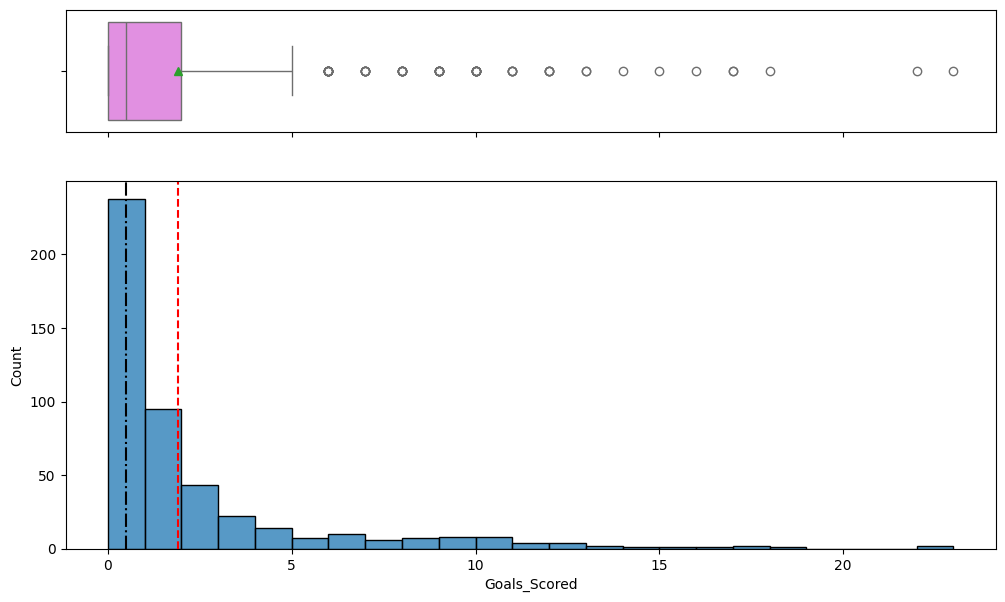

In [ ]:
histogram_boxplot_fun(data, 'Goals_Scored')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def histogram_boxplot_fun(data, feature, bins=23, kde=False):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,         # Number of rows of the subplot grid = 2
        sharex=True,     # X-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (1, 3)},
        figsize=(12, 7)  # Creating the subplots
    )

    # Boxplot
    sns.boxplot(
        data=data,
        x=feature,
        ax=ax_box2,
        showmeans=True,
        color='violet'
    )

    # Histogram
    sns.histplot(
        data=data,
        x=feature,
        kde=kde,
        ax=ax_hist2,
        bins=bins,
        color="skyblue"
    )

    # Add mean and median lines
    ax_hist2.axvline(x=data[feature].mean(), color='green', linestyle='--', label="Mean")
    ax_hist2.axvline(x=data[feature].median(), color='black', linestyle='-', label="Median")

    # Add legend
    ax_hist2.legend()

    plt.show()


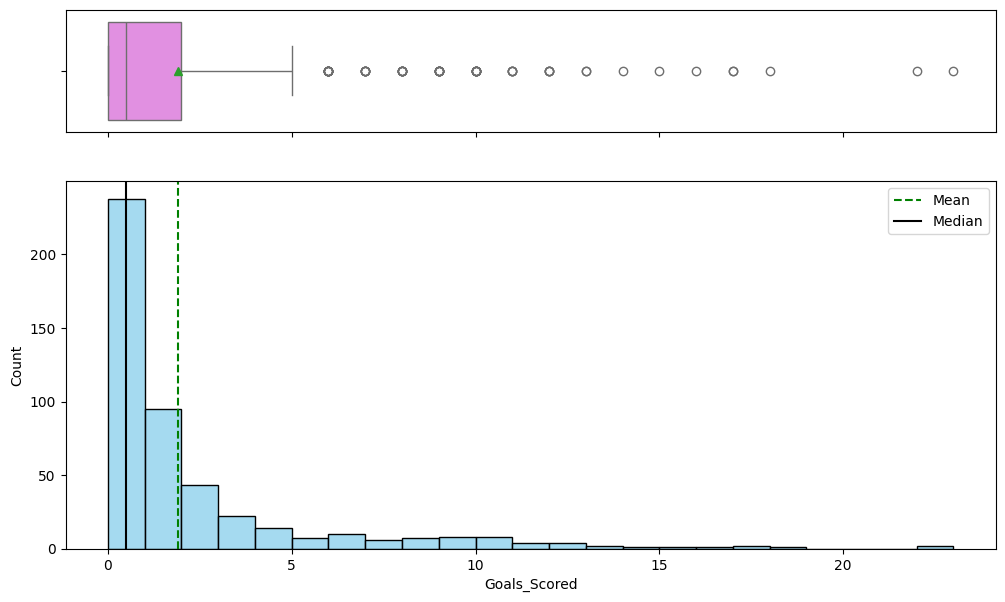

In [ ]:
histogram_boxplot_fun(data, 'Goals_Scored')

In [ ]:
data.head(1)

Player_Name     Club    Position  Goals_Scored  Assists  Total_Points  \
0  Alex Runnarsson  Arsenal  Goalkeeper             0        0             1   

   Minutes  Goals_Conceded  Creativity  Influence  Threat  Bonus  Clean_Sheets  
0       15               0         0.0       16.6       0      0             0

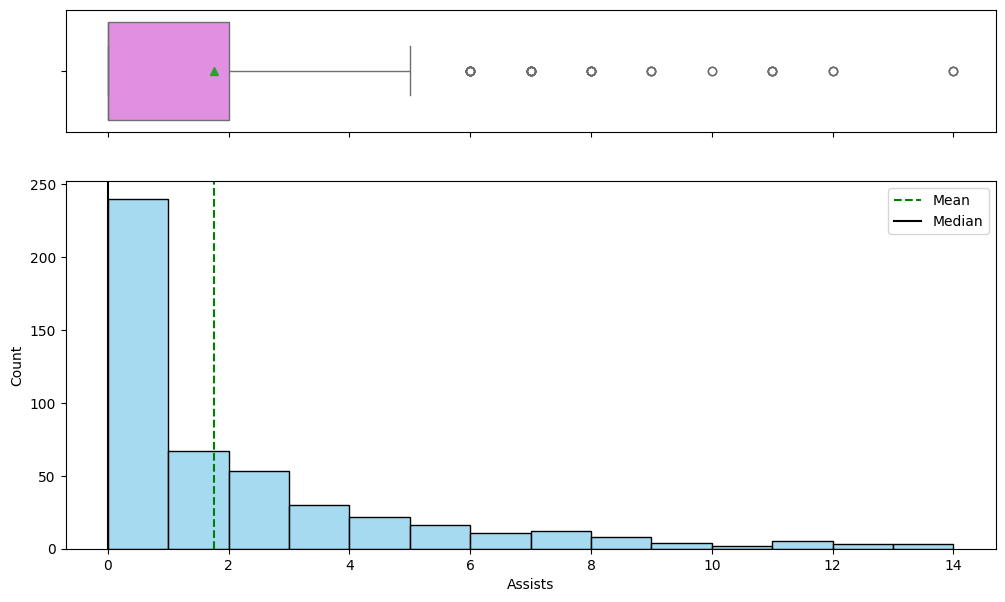

In [ ]:
histogram_boxplot_fun(data, 'Assists', bins = 14)

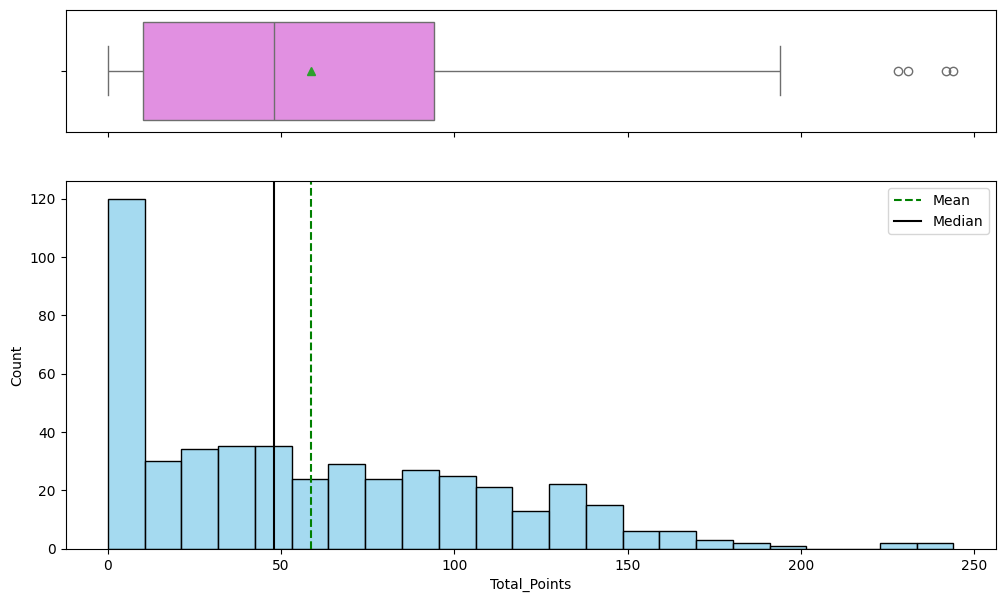

In [ ]:
histogram_boxplot_fun(data, 'Total_Points', bins = 23)

In [ ]:
data[data['Total_Points'] > 180]

Player_Name                Club    Position  Goals_Scored  Assists  \
36   Emiliano Martinez         Aston Villa  Goalkeeper             0        0   
219    Patrick Bamford        Leeds United     Forward            17       11   
238        Jamie Vardy      Leicester City     Forward            15       14   
269      Mohamed Salah           Liverpool  Midfielder            22        6   
315    Bruno Fernandes   Manchester United  Midfielder            18       14   
403         Harry Kane  Tottenham Hotspurs     Forward            23       14   
405      Heung-Min Son  Tottenham Hotspurs  Midfielder            17       11   

     Total_Points  Minutes  Goals_Conceded  Creativity  Influence  Threat  \
36            186     3420              46        20.0     1067.2       0   
219           194     3052              50       371.0      867.2    1512   
238           187     2838              44       356.6      819.2    1306   
269           231     3077              41       825.7     1056.0    1980   
315           244     3101              36      1414.9     1292.6    1253   
403           242     3083              39       659.1     1318.2    1585   
405           228     3119              36      1049.9     1052.2    1046   

     Bonus  Clean_Sheets  
36      27            15  
219     26            10  
238     23             8  
269     21            11  
315     36            13  
403     40            12  
405     26            13

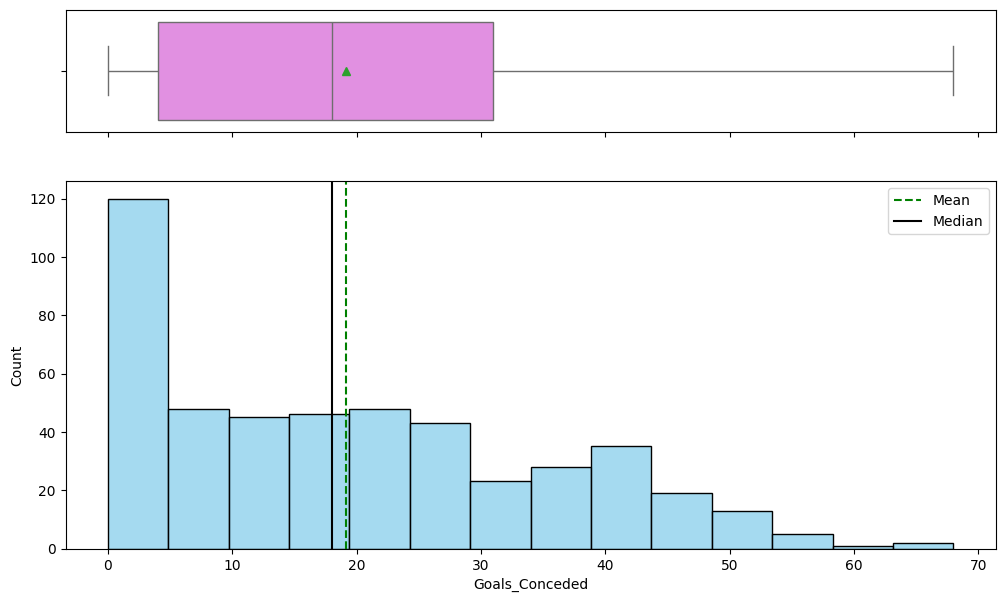

In [ ]:
histogram_boxplot_fun(data, 'Goals_Conceded', bins = 14)

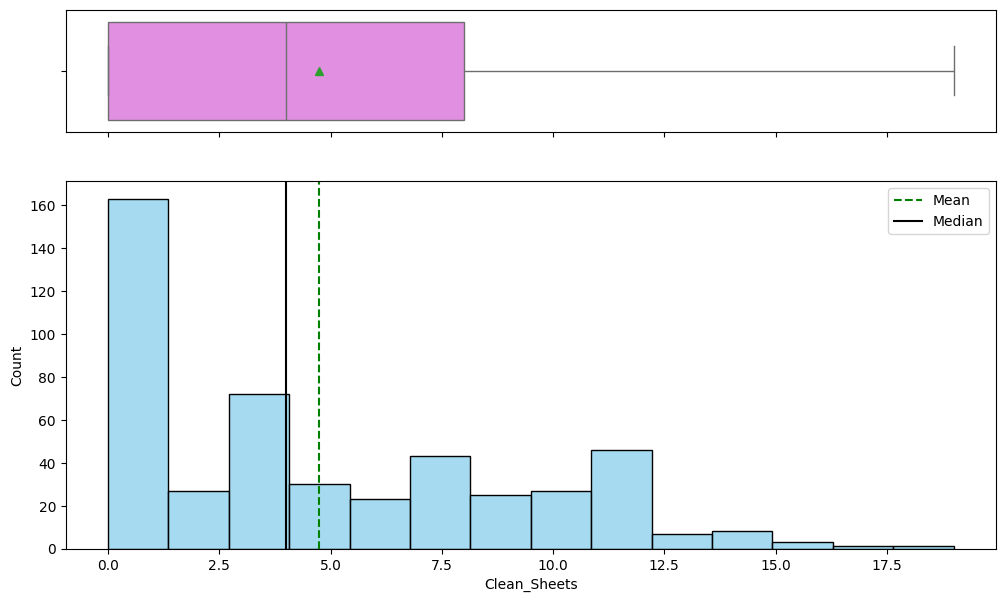

In [ ]:
histogram_boxplot_fun(data, 'Clean_Sheets', bins = 14)

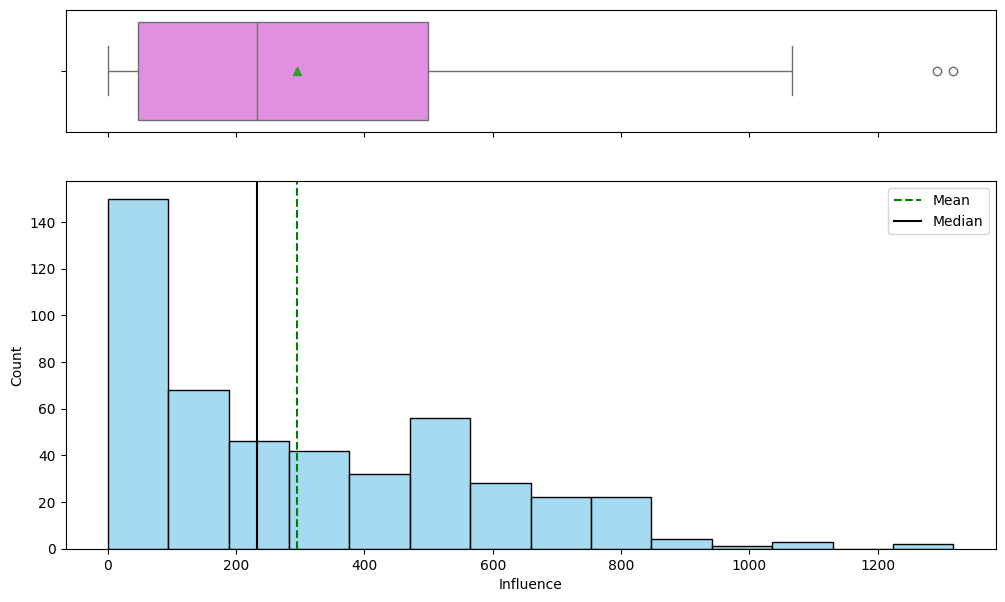

In [ ]:
histogram_boxplot_fun(data, 'Influence', bins = 14)

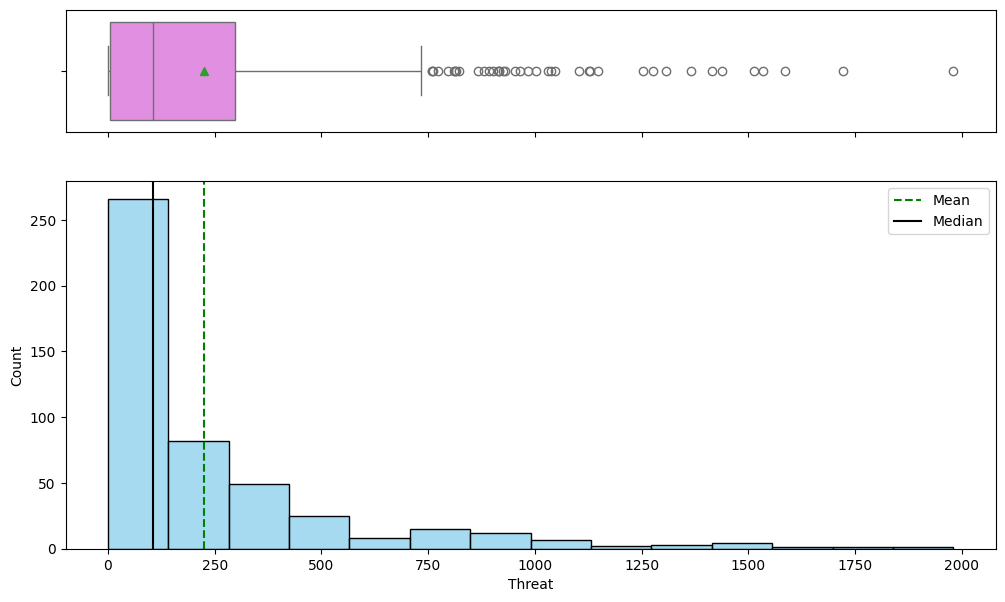

In [ ]:
histogram_boxplot_fun(data, 'Threat', bins = 14)

# Multivariate Analysis


In [ ]:
# Separating columns with numerical data types.
data_num = data.select_dtypes(include='number')

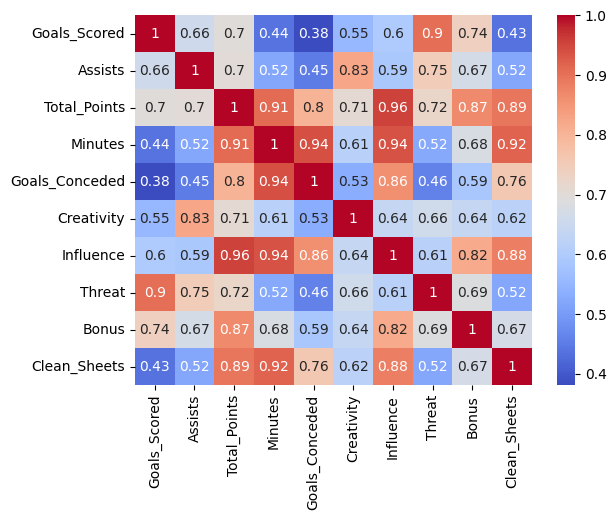

In [ ]:
# Creating a correlation heatmap.
sns.heatmap(data_num.corr(), annot=True, cmap='coolwarm')
plt.show()


# Observation
The highest correlation can be seen beteween 'Influence' and 'Total_Points' at 0.96.
The lowest correlation is seen between 'Goals_Conceded" and ' Goals_Scored' at 0.38.

In [ ]:
def barplot_fun(data, feature, target):
    f2, ax = plt.subplots(figsize=(12, 7))

    sns.barplot(
        data=data,
        x=feature,
        y=target,
        ax=ax,
        color='violet',
        errorbar=None  # removes error bars
    )

    # Add mean line of target
    ax.axhline(y=data[target].mean(), color='green', linestyle='--', label="Mean")
    ax.legend()

    plt.show()


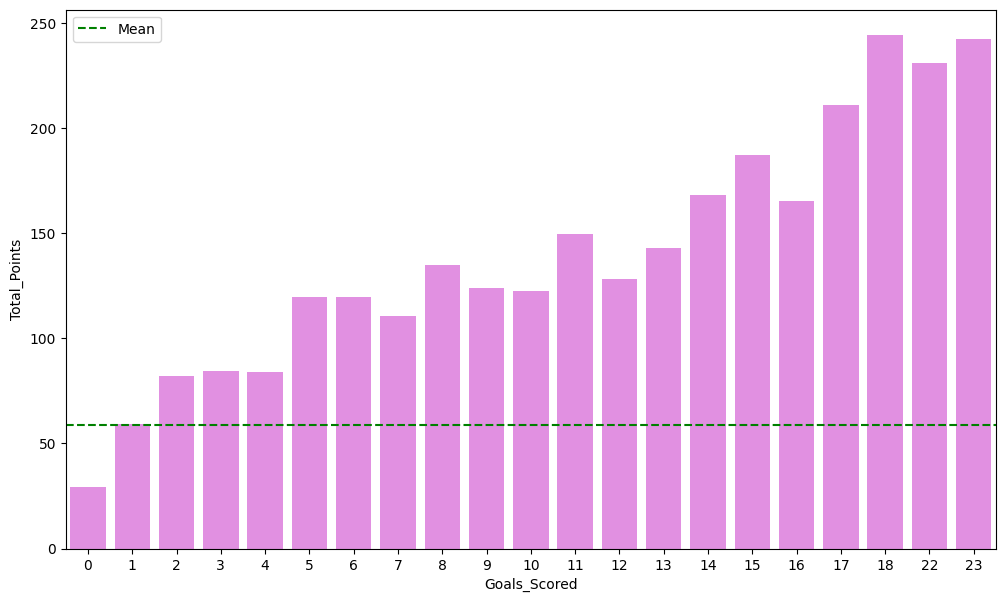

In [ ]:
barplot_fun(data, 'Goals_Scored', 'Total_Points')

In [ ]:
data.head()

Player_Name     Club    Position  Goals_Scored  Assists  \
0      Alex Runnarsson  Arsenal  Goalkeeper             0        0   
1  Alexandre Lacazette  Arsenal     Forward            13        3   
2           Bernd Leno  Arsenal  Goalkeeper             0        0   
3          Bukayo Saka  Arsenal  Midfielder             5        5   
4       Calum Chambers  Arsenal    Defender             0        3   

   Total_Points  Minutes  Goals_Conceded  Creativity  Influence  Threat  \
0             1       15               0         0.0       16.6       0   
1           129     1916              21       307.4      602.4     797   
2           131     3131              37         0.0      702.2       2   
3           114     2554              31       650.6      493.0     984   
4            36      751              10       169.4      171.8      77   

   Bonus  Clean_Sheets  
0      0             0  
1     21             7  
2     11            11  
3      8             8  
4      3             2

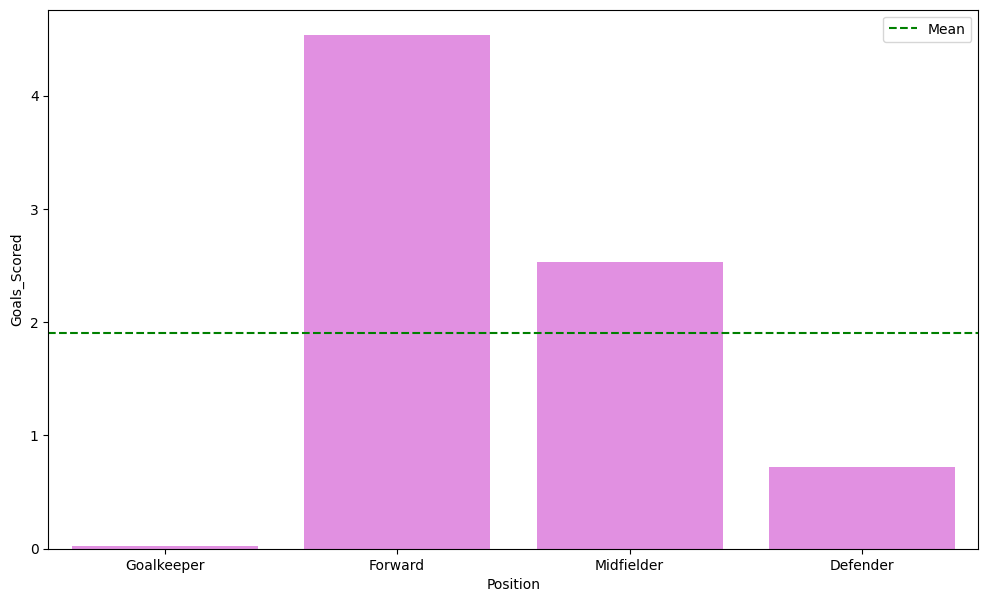

In [ ]:
barplot_fun(data, 'Position', 'Goals_Scored')

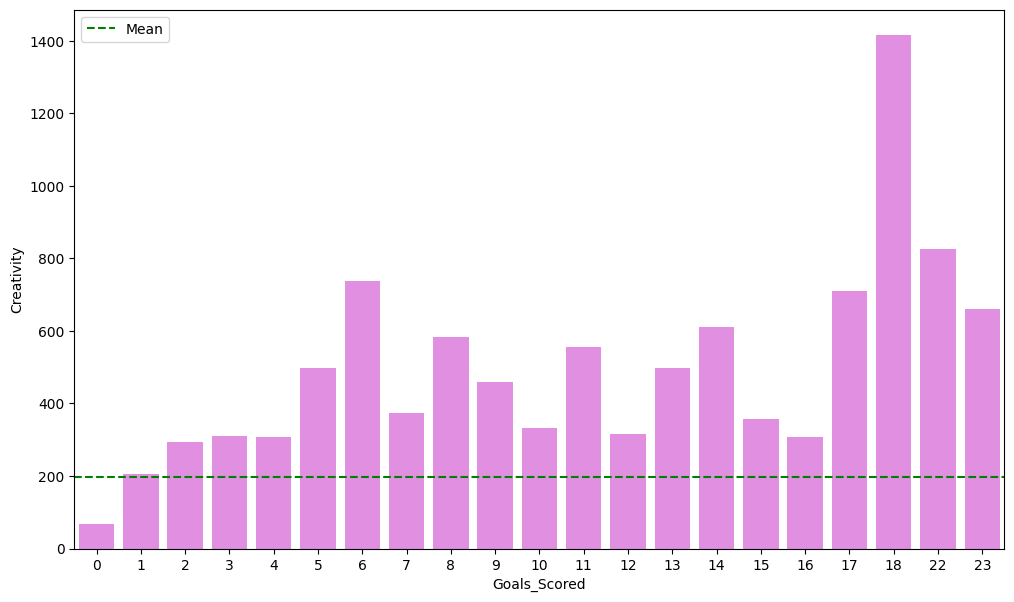

In [ ]:
barplot_fun(data, 'Goals_Scored', 'Creativity')

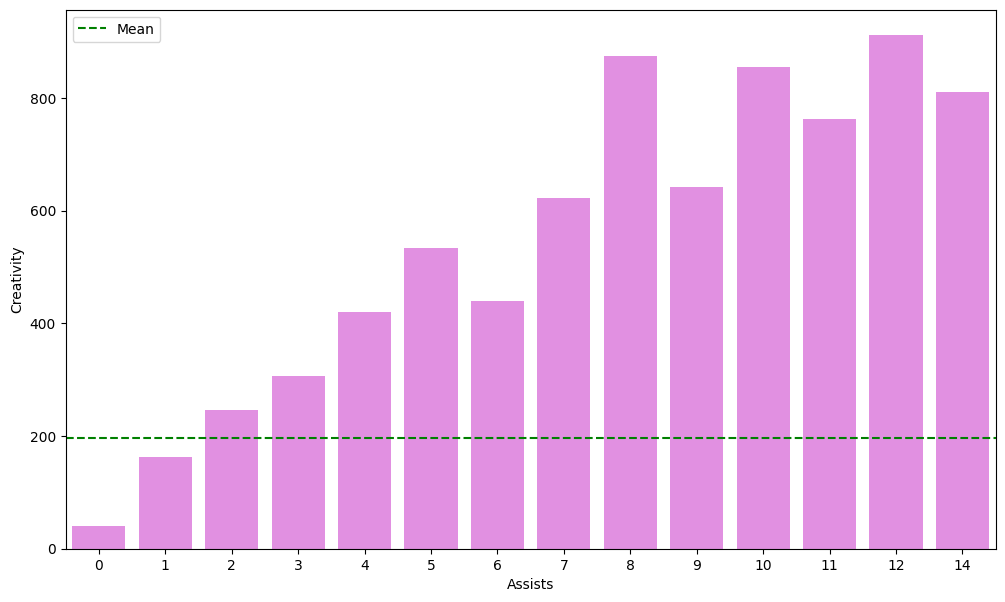

In [ ]:
barplot_fun(data, 'Assists', 'Creativity')

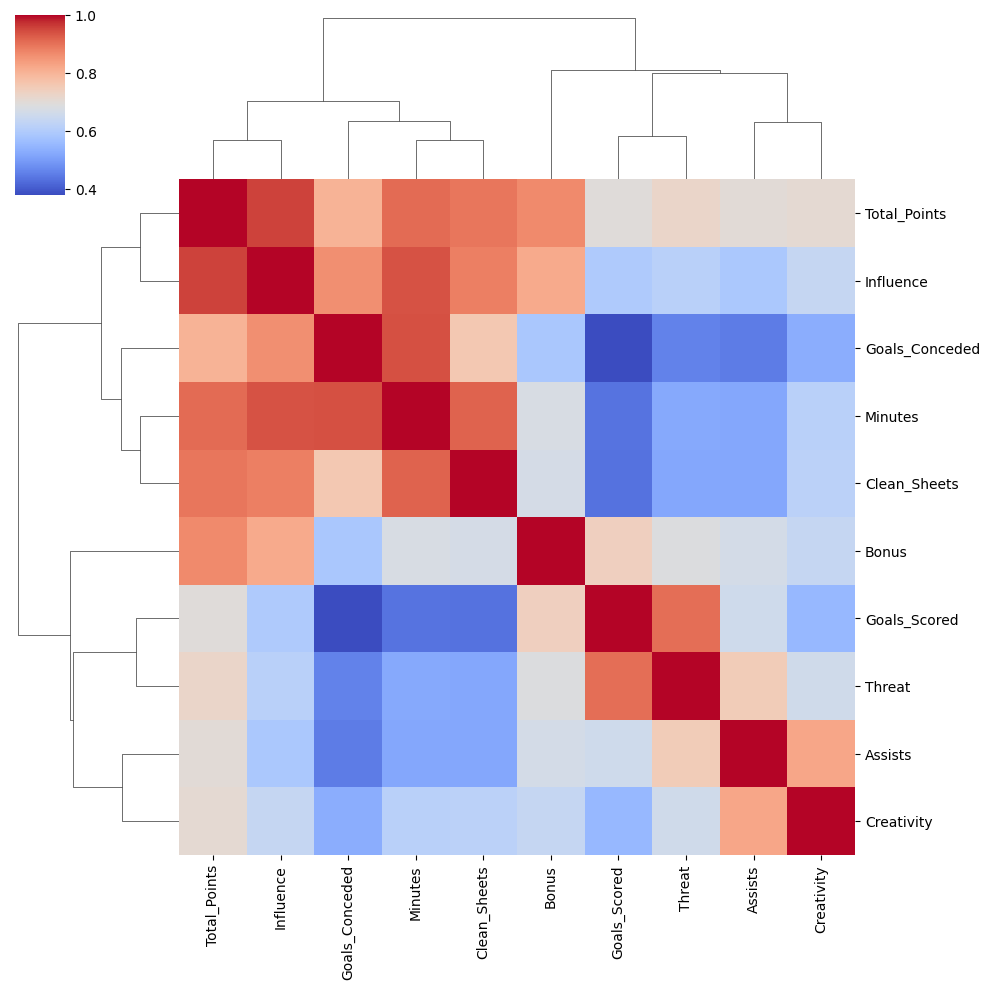

In [ ]:
sns.clustermap(data_num.corr(), cmap="coolwarm")

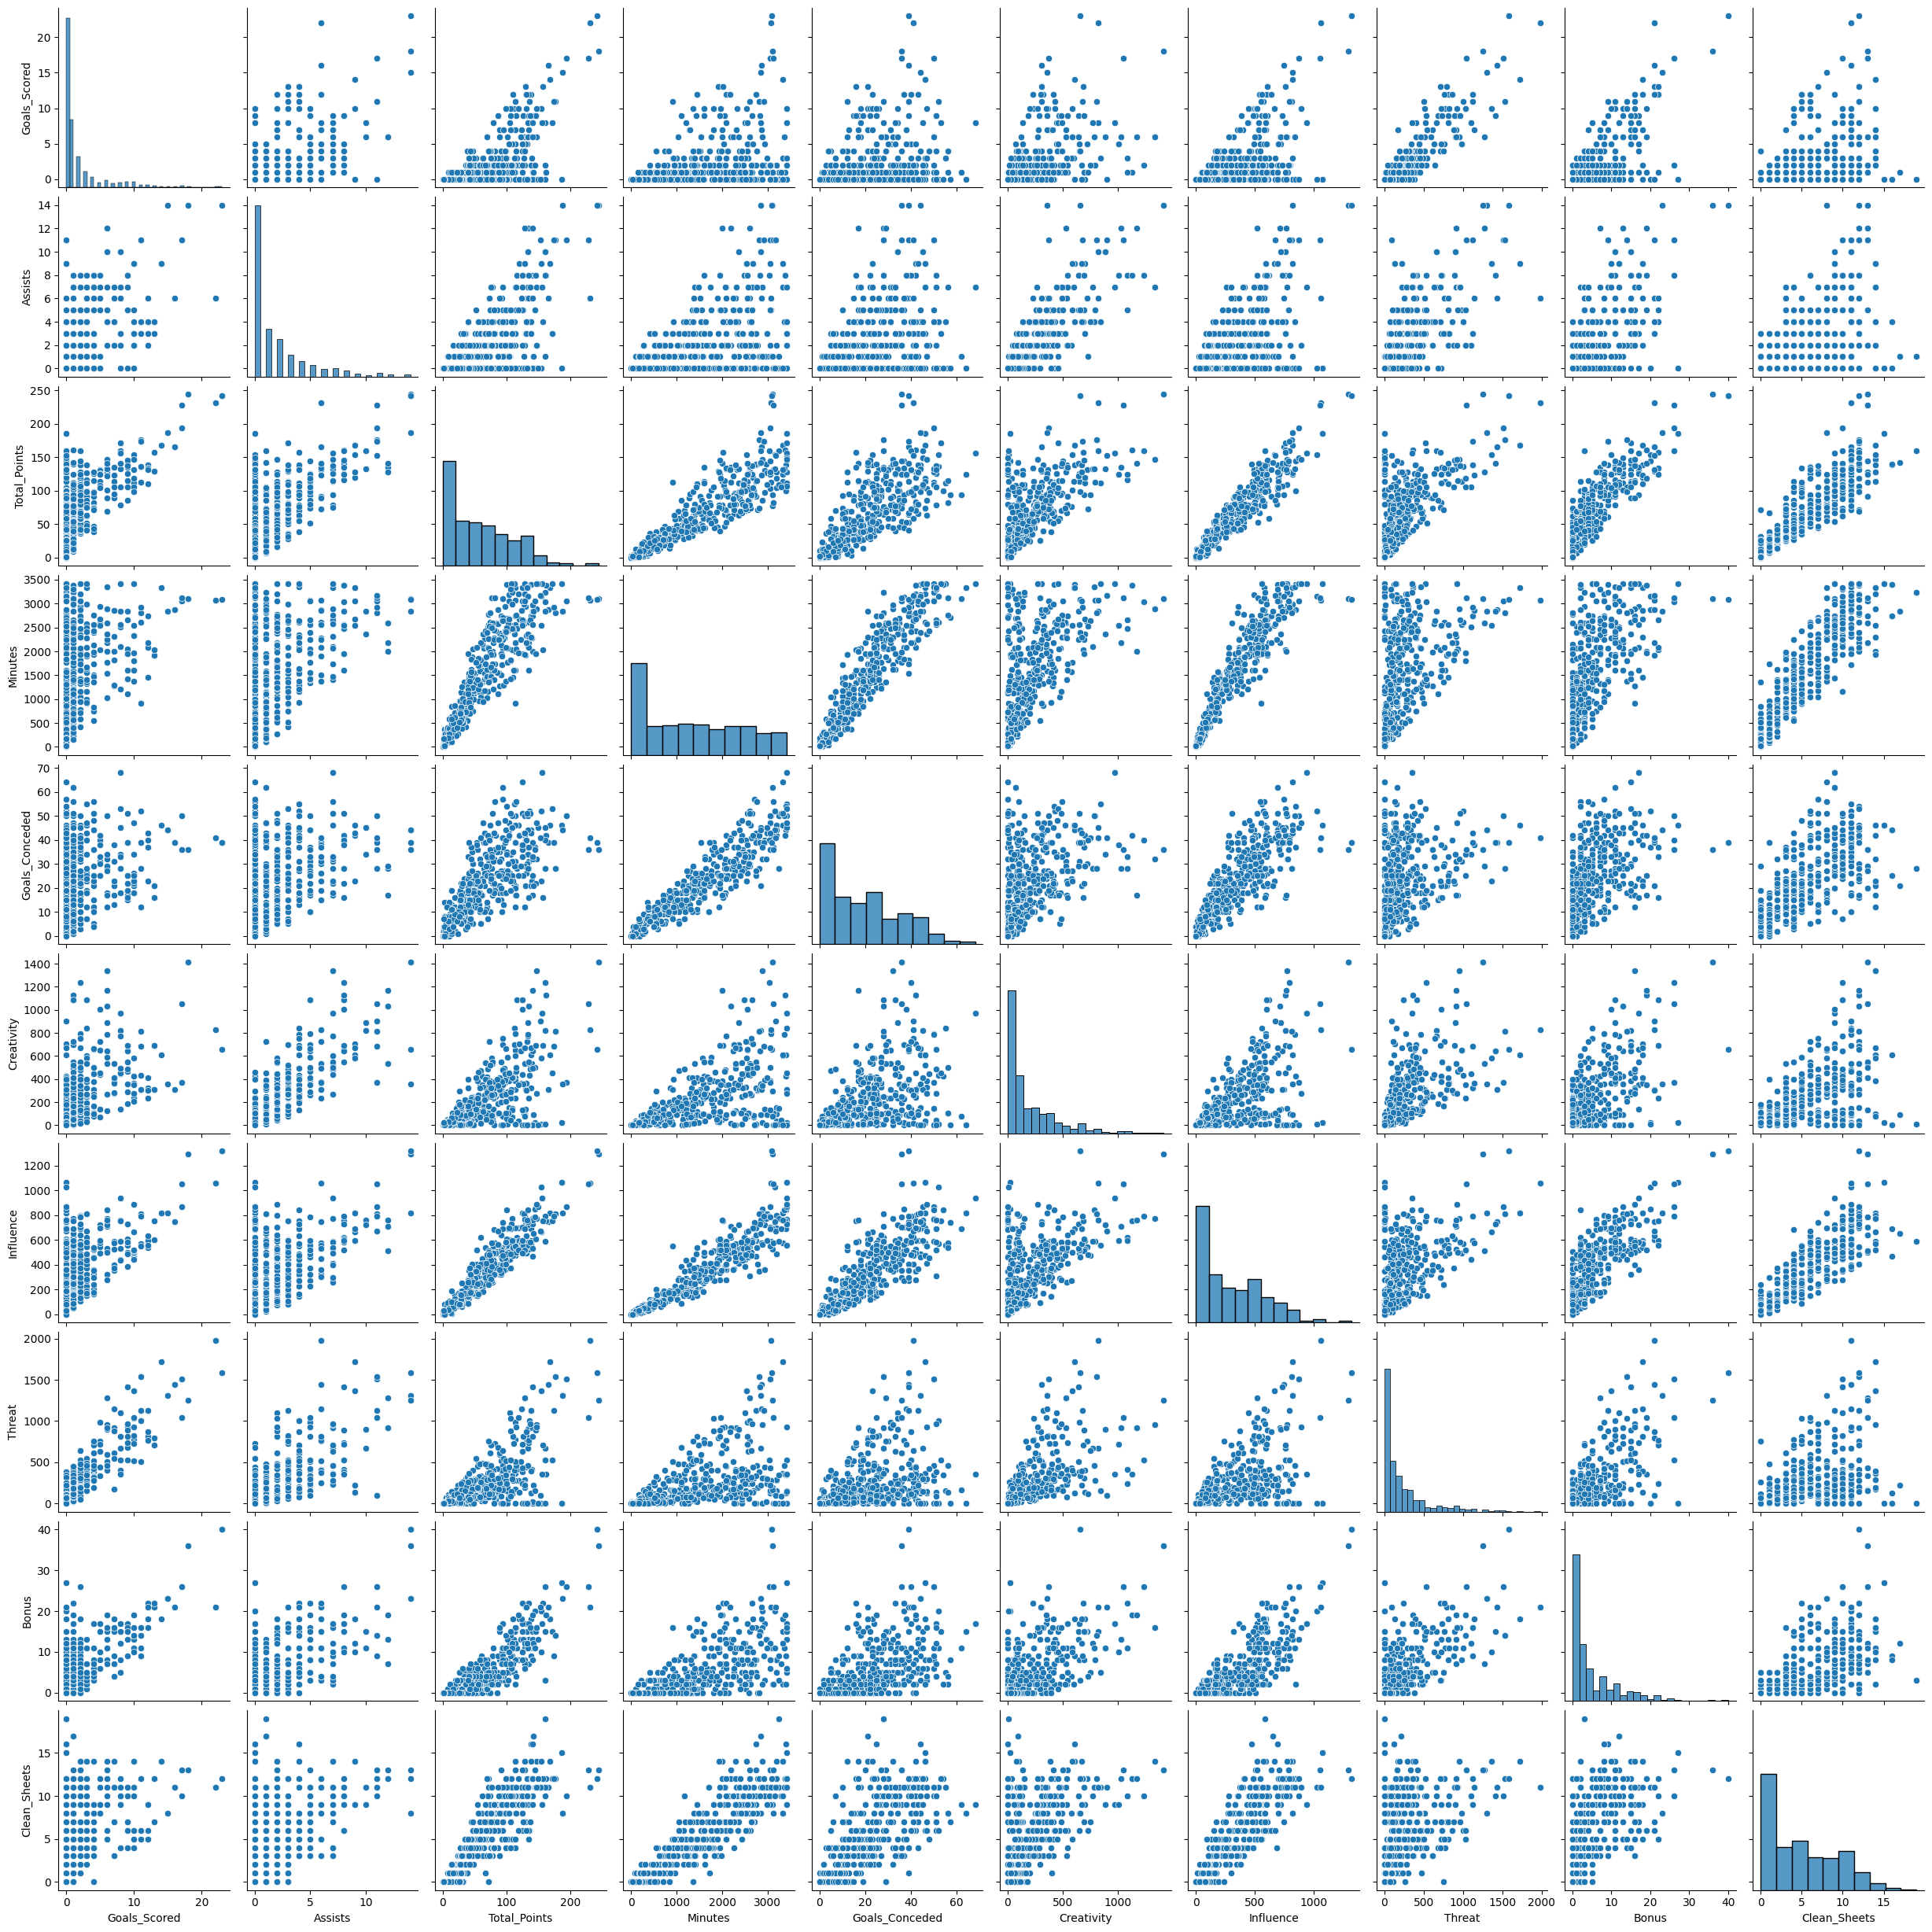

In [ ]:
sns.pairplot(data, hue=None)

Lets see which players scored the most fantasy points last season for different positions of play.

In [ ]:
data.head()

Player_Name     Club    Position  Goals_Scored  Assists  \
0      Alex Runnarsson  Arsenal  Goalkeeper             0        0   
1  Alexandre Lacazette  Arsenal     Forward            13        3   
2           Bernd Leno  Arsenal  Goalkeeper             0        0   
3          Bukayo Saka  Arsenal  Midfielder             5        5   
4       Calum Chambers  Arsenal    Defender             0        3   

   Total_Points  Minutes  Goals_Conceded  Creativity  Influence  Threat  \
0             1       15               0         0.0       16.6       0   
1           129     1916              21       307.4      602.4     797   
2           131     3131              37         0.0      702.2       2   
3           114     2554              31       650.6      493.0     984   
4            36      751              10       169.4      171.8      77   

   Bonus  Clean_Sheets  
0      0             0  
1     21             7  
2     11            11  
3      8             8  
4      3             2

In [ ]:
data.groupby(['Position'])['Total_Points'].max()

Position
Defender      171
Forward       242
Goalkeeper    186
Midfielder    244
Name: Total_Points, dtype: int64

In [ ]:
df_For = data.loc[data[data['Position'] == 'Forward']['Total_Points'].sort_values(ascending=False).index[0:5],['Player_Name','Club','Position','Total_Points']]
df_Mid = data.loc[data[data['Position'] == 'Midfielder']['Total_Points'].sort_values(ascending=False).index[0:5],['Player_Name','Club','Position','Total_Points']]
df_Def = data.loc[data[data['Position'] == 'Defender']['Total_Points'].sort_values(ascending=False).index[0:5],['Player_Name','Club','Position','Total_Points']]
df_Goal = data.loc[data[data['Position'] == 'Goalkeeper']['Total_Points'].sort_values(ascending=False).index[0:5],['Player_Name','Club','Position','Total_Points']]
print(df_For)
print(df_Mid)
print(df_Def)
print(df_Goal)

               Player_Name                Club Position  Total_Points
403             Harry Kane  Tottenham Hotspurs  Forward           242
219        Patrick Bamford        Leeds United  Forward           194
238            Jamie Vardy      Leicester City  Forward           187
51           Ollie Watkins         Aston Villa  Forward           168
177  Dominic Calvert-Lewin             Everton  Forward           165
         Player_Name                Club    Position  Total_Points
315  Bruno Fernandes   Manchester United  Midfielder           244
269    Mohamed Salah           Liverpool  Midfielder           231
405    Heung-Min Son  Tottenham Hotspurs  Midfielder           228
276       Sadio Mane           Liverpool  Midfielder           176
326  Marcus Rashford   Manchester United  Midfielder           174
                Player_Name               Club  Position  Total_Points
223           Stuart Dallas       Leeds United  Defender           171
257        Andrew Robertson         

In [ ]:
pd.concat([df_For, df_Mid, df_Def, df_Goal])

Player_Name                Club    Position  Total_Points
403              Harry Kane  Tottenham Hotspurs     Forward           242
219         Patrick Bamford        Leeds United     Forward           194
238             Jamie Vardy      Leicester City     Forward           187
51            Ollie Watkins         Aston Villa     Forward           168
177   Dominic Calvert-Lewin             Everton     Forward           165
315         Bruno Fernandes   Manchester United  Midfielder           244
269           Mohamed Salah           Liverpool  Midfielder           231
405           Heung-Min Son  Tottenham Hotspurs  Midfielder           228
276              Sadio Mane           Liverpool  Midfielder           176
326         Marcus Rashford   Manchester United  Midfielder           174
223           Stuart Dallas        Leeds United    Defender           171
257        Andrew Robertson           Liverpool    Defender           161
278  Trent Alexander-Arnold           Liverpool    Defender           160
421         Aaron Cresswell     West Ham United    Defender           153
308       Aaron Wan-Bissaka   Manchester United    Defender           144
36        Emiliano Martinez         Aston Villa  Goalkeeper           186
284          Ederson Moares     Manchester City  Goalkeeper           160
203           Illan Meslier        Leeds United  Goalkeeper           154
406             Hugo Lloris  Tottenham Hotspurs  Goalkeeper           149
107               Nick Pope             Burnley  Goalkeeper           144

In [ ]:
data_num.select_dtypes(include='number')

Goals_Scored  Assists  Total_Points  Minutes  Goals_Conceded  Creativity  \
0               0        0             1       15               0         0.0   
1              13        3           129     1916              21       307.4   
2               0        0           131     3131              37         0.0   
3               5        5           114     2554              31       650.6   
4               0        3            36      751              10       169.4   
5               0        1            28      744              11       114.8   
6               0        4            62     1609              17       422.3   
7               1        0            41     1396              20        46.7   
8               2        1            36      411               6        97.3   
9               2        5            74     1438              10       385.1   
10              2        0            78     1996              24        51.0   
11              2        1            36      582               3       133.8   
12              1        2            70     2519              27       327.6   
13              1        3            94     2089              24       351.8   
14              1        4            96     2299              27       490.1   
15              1        2            40      861              12       322.8   
16              0        0             0        0               0         0.0   
17              0        0             0        0               0         0.0   
18              1        0            50     1538              20        99.9   
19             10        3           114     1606              21       235.9   
20              0        0            34      900               8        26.4   
21             10        3           131     2330              26       361.5   
22              0        0             2       70               0         9.7   
23              0        1           105     2557              26        76.1   
24              0        0             2       90               1         5.4   
25              0        0             3       45               1         1.0   
26              0        0             0        0               0         0.0   
27              0        2            47     1529              18       195.7   
28              0        0             0        0               0         0.0   
29              1        7            78     1398              17       534.8   
30              0        0            33      833               9       201.8   
31             10        0           111     1604              22       426.1   
32              7        7           135     2315              31       530.6   
33              0        0             2       18               0         1.1   
34              1        1            20      225               2        82.9   
35              0        2            72     2781              41       304.5   
36              0        0           186     3420              46        20.0   
37              2        0           119     3195              46        34.2   
38              0        0             0        0               0         0.0   
39              6       12           135     2183              28      1029.6   
40              0        0            28      611              10        91.7   
41              0        0             1        1               0         0.5   
42              3        7           114     3330              46       600.5   
43              0        0             0        0               0         0.0   
44              1        1            23      265               1        76.7   
45              1        0            32      630               6         2.2   
46              2        1            56     1157              14       180.1   
47              0        1            27      747               6        32.5   
48              0        4          

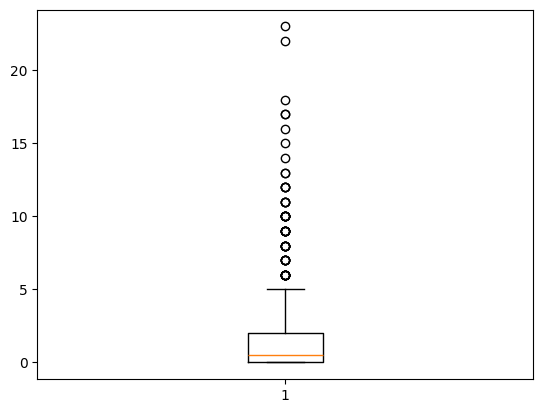

In [ ]:
plt.boxplot(data_num['Goals_Scored'])
plt.show()

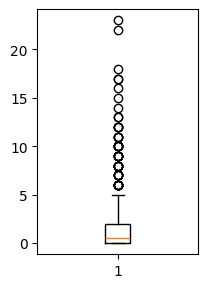

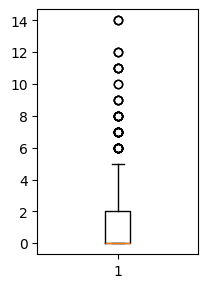

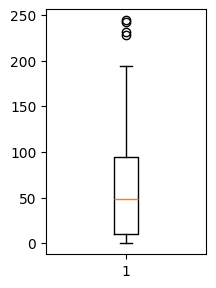

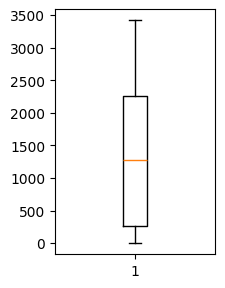

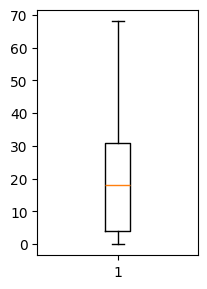

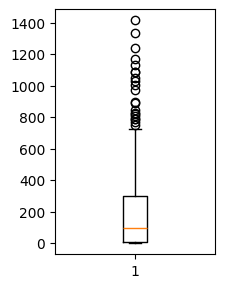

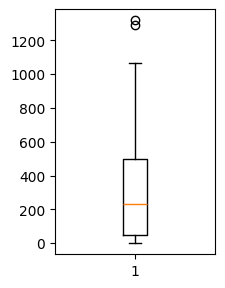

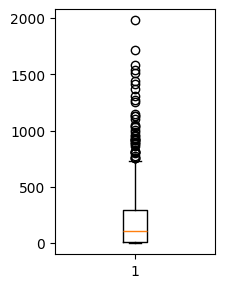

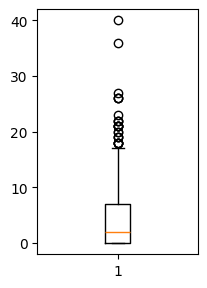

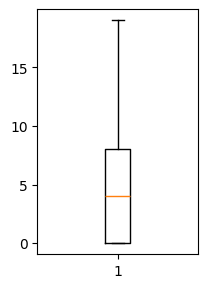

In [ ]:
for i, j in enumerate(data_num):
  plt.figure(figsize=(12,7))
  plt.subplot(2,5, i+1)
  plt.boxplot(data[j])


# Cluster Analysis

In [ ]:
# Preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(data_num)
data_scaled = scaler.transform(data_num)

In [ ]:
data_scaled

array([[-0.55260758, -0.64755534, -1.12250583, ..., -0.70763762,
        -0.75543496, -1.08112276],
       [ 3.21340088,  0.46120848,  1.37555959, ...,  1.79939343,
         2.60668787,  0.51352135],
       [-0.55260758, -0.64755534,  1.41459187, ..., -0.70134645,
         1.005677  ,  1.42474655],
       ...,
       [-0.55260758, -0.2779674 , -0.63460243, ..., -0.48115552,
        -0.75543496, -1.08112276],
       [-0.26291462, -0.2779674 , -0.36137652, ...,  0.09763208,
        -0.2751317 ,  0.05790874],
       [-0.26291462, -0.2779674 ,  0.18507529, ..., -0.13514119,
        -0.11503061,  0.28571505]])

In [ ]:
data_scaled_df = pd.DataFrame(data_scaled, columns=data_num.columns)
data_scaled_df

Goals_Scored   Assists  Total_Points   Minutes  Goals_Conceded  \
0       -0.552608 -0.647555     -1.122506 -1.232383       -1.202653   
1        3.213401  0.461208      1.375560  0.539871        0.115663   
2       -0.552608 -0.647555      1.414592  1.672585        1.120094   
3        0.895857  1.200384      1.082818  1.134662        0.743432   
4       -0.552608  0.461208     -0.439441 -0.546229       -0.574884   
5       -0.552608 -0.277967     -0.595570 -0.552755       -0.512107   
6       -0.552608  0.830796      0.067978  0.253663       -0.135445   
7       -0.262915 -0.647555     -0.341860  0.055088        0.052886   
8        0.026778 -0.277967     -0.439441 -0.863202       -0.825992   
9        0.026778  1.200384      0.302172  0.094244       -0.574884   
10       0.026778 -0.647555      0.380237  0.614453        0.303993   
11       0.026778 -0.277967     -0.439441 -0.703783       -1.014323   
12      -0.262915  0.091621      0.224108  1.102033        0.492324   
13      -0.262915  0.461208      0.692495  0.701155        0.303993   
14      -0.262915  0.830796      0.731527  0.896932        0.492324   
15      -0.262915  0.091621     -0.361377 -0.443678       -0.449330   
16      -0.552608 -0.647555     -1.142022 -1.246367       -1.202653   
17      -0.552608 -0.647555     -1.142022 -1.246367       -1.202653   
18      -0.262915 -0.647555     -0.166215  0.187471        0.052886   
19       2.344322  0.461208      1.082818  0.250866        0.115663   
20      -0.552608 -0.647555     -0.478473 -0.407320       -0.700438   
21       2.344322  0.461208      1.414592  0.925833        0.429547   
22      -0.552608 -0.647555     -1.102990 -1.181108       -1.202653   
23      -0.552608 -0.277967      0.907172  1.137459        0.429547   
24      -0.552608 -0.647555     -1.102990 -1.162462       -1.139877   
25      -0.552608 -0.647555     -1.083474 -1.204414       -1.139877   
26      -0.552608 -0.647555     -1.142022 -1.246367       -1.202653   
27      -0.552608  0.091621     -0.224764  0.179081       -0.072668   
28      -0.552608 -0.647555     -1.142022 -1.246367       -1.202653   
29      -0.262915  1.939560      0.380237  0.056953       -0.135445   
30      -0.552608 -0.647555     -0.497989 -0.469782       -0.637661   
31       2.344322 -0.647555      1.024269  0.249002        0.178440   
32       1.475243  1.939560      1.492656  0.911849        0.743432   
33      -0.552608 -0.647555     -1.102990 -1.229586       -1.202653   
34      -0.262915 -0.277967     -0.751699 -1.036605       -1.077100   
35      -0.552608  0.091621      0.263140  1.346289        1.371202   
36      -0.552608 -0.647555      2.487979  1.942012        1.685086   
37       0.026778 -0.647555      1.180398  1.732250        1.685086   
38      -0.552608 -0.647555     -1.142022 -1.246367       -1.202653   
39       1.185550  3.787500      1.492656  0.788788        0.555101   
40      -0.552608 -0.647555     -0.595570 -0.676747       -0.574884   
41      -0.552608 -0.647555     -1.122506 -1.245434       -1.202653   
42       0.316471  1.939560      1.082818  1.858107        1.685086   
43      -0.552608 -0.647555     -1.142022 -1.246367       -1.202653   
44      -0.262915 -0.277967     -0.693151 -0.999314       -1.139877   
45      -0.262915 -0.647555     -0.517506 -0.659034       -0.825992   
46       0.026778 -0.277967     -0.049118 -0.167725       -0.323776   
47      -0.552608 -0.277967     -0.615086 -0.549958       -0.825992   
48      -0.552608  0.830796      1.551205  1.927096        1.559533   
49      -0.552608  0.091621      0.594914  0.965921        0.994540   
50      -0.552608 -0.647555     -0.946861 -0.977872       -0.951546   
51       3.503094  2.678736      2.136689  1.856243        1.685086   
52      -0.552608 -0.647555     -1.142022 -1.246367       -1.202653   
53       0.316471  0.091621      0.341204  0.213575        0.303993   
54       0.026778  0.091621      1.356043  1.731318        1.433979   
55      -0.552608 -0.647555  

In [ ]:
data_scaled_df['Goals_Scored'] - data_scaled_df['Goals_Scored'].mean() # Checking that the columnsm are scaled

0     -0.552608
1      3.213401
2     -0.552608
3      0.895857
4     -0.552608
5     -0.552608
6     -0.552608
7     -0.262915
8      0.026778
9      0.026778
10     0.026778
11     0.026778
12    -0.262915
13    -0.262915
14    -0.262915
15    -0.262915
16    -0.552608
17    -0.552608
18    -0.262915
19     2.344322
20    -0.552608
21     2.344322
22    -0.552608
23    -0.552608
24    -0.552608
25    -0.552608
26    -0.552608
27    -0.552608
28    -0.552608
29    -0.262915
30    -0.552608
31     2.344322
32     1.475243
33    -0.552608
34    -0.262915
35    -0.552608
36    -0.552608
37     0.026778
38    -0.552608
39     1.185550
40    -0.552608
41    -0.552608
42     0.316471
43    -0.552608
44    -0.262915
45    -0.262915
46     0.026778
47    -0.552608
48    -0.552608
49    -0.552608
50    -0.552608
51     3.503094
52    -0.552608
53     0.316471
54     0.026778
55    -0.552608
56     0.026778
57    -0.262915
58    -0.262915
59    -0.262915
60    -0.552608
61    -0.552608
62    -0.552608
63    -0.552608
64    -0.262915
65     1.185550
66    -0.552608
67    -0.552608
68    -0.552608
69    -0.552608
70    -0.262915
71    -0.552608
72     0.895857
73     0.895857
74    -0.552608
75     1.764936
76     0.316471
77    -0.552608
78    -0.552608
79    -0.552608
80     0.026778
81    -0.262915
82    -0.262915
83    -0.262915
84    -0.552608
85     0.316471
86     0.316471
87    -0.552608
88     0.026778
89    -0.552608
90     2.923708
91    -0.552608
92     0.026778
93    -0.552608
94    -0.552608
95    -0.262915
96    -0.262915
97     0.026778
98    -0.262915
99    -0.552608
100    0.026778
101   -0.552608
102   -0.552608
103   -0.552608
104   -0.552608
105    0.316471
106   -0.262915
107   -0.552608
108   -0.552608
109   -0.262915
110   -0.552608
111   -0.552608
112   -0.262915
113    0.316471
114   -0.552608
115    0.026778
116   -0.262915
117    0.606164
118   -0.552608
119   -0.552608
120   -0.552608
121   -0.552608
122    0.026778
123    1.475243
124    0.606164
125   -0.552608
126   -0.552608
127    0.895857
128    0.026778
129    1.185550
130   -0.552608
131   -0.552608
132    0.606164
133   -0.262915
134    1.185550
135    0.026778
136    1.185550
137   -0.552608
138   -0.552608
139   -0.262915
140   -0.262915
141    2.344322
142   -0.552608
143    0.606164
144   -0.262915
145   -0.552608
146    0.026778
147   -0.552608
148   -0.552608
149   -0.552608
150   -0.262915
151    0.026778
152   -0.552608
153   -0.262915
154   -0.262915
155   -0.552608
156   -0.552608
157    0.026778
158   -0.552608
159   -0.552608
160   -0.552608
161   -0.552608
162   -0.552608
163   -0.552608
164   -0.262915
165   -0.552608
166   -0.262915
167   -0.552608
168    2.634015
169    0.026778
170   -0.262915
171   -0.552608
172   -0.552608
173   -0.552608
174   -0.552608
175   -0.262915
176   -0.552608
177    4.082480
178   -0.552608
179    1.185550
180    1.185550
181   -0.552608
182   -0.552608
183   -0.552608
184   -0.552608
185   -0.552608
186   -0.262915
187    0.316471
188   -0.552608
189   -0.552608
190   -0.552608
191    1.475243
192   -0.552608
193   -0.552608
194   -0.552608
195    0.026778
196   -0.552608
197   -0.262915
198    0.026778
199   -0.552608
200   -0.552608
201    0.316471
202   -0.552608
203   -0.552608
204    1.764936
205   -0.552608
206   -0.552608
207   -0.552608
208   -0.552608
209   -0.262915
210   -0.552608
211   -0.552608
212   -0.262915
213   -0.552608
214   -0.552608
215    0.606164
216   -0.552608
217   -0.552608
218   -0.262915
219    4.372173
220    1.185550
221   -0.552608
222    1.475243
223    1.764936
224   -0.262915
225    0.026778
226   -0.262915
227   -0.552608
228   -0.552608
229   -0.262915
230   -0.552608
231   -0.262915
232   -0.552608
233   -0.552608
234    2.054629
235   -0.552608
236    0.026778
237    1.764936
238    3.792787
239    0.026778
240   -0.552608
241    2.923708
242   -0.262915
243   -0.262915
244   -0.552608
245   -0.552608
246   -0.552608
247   -0.552608
248    0.026778
249   -0.552608


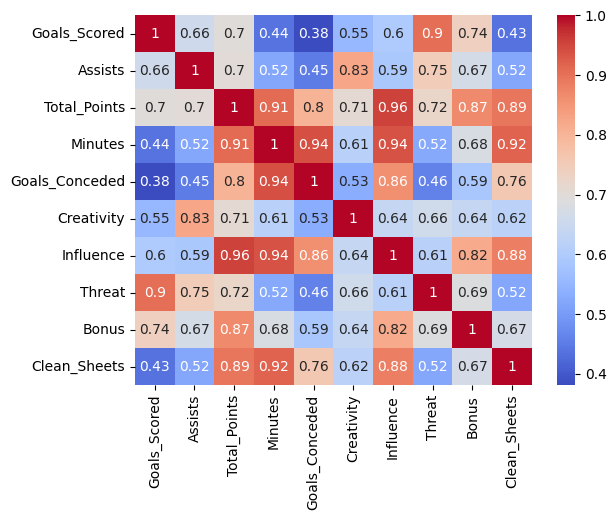

In [ ]:
sns.heatmap(data_scaled_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=data_scaled_df.shape[1], random_state=0)
pca.fit(data_scaled_df)
pca_df = pca.transform(data_scaled_df)


In [ ]:
pca_df

array([[-2.91660039e+00,  5.69939118e-01, -4.18712595e-02, ...,
         6.47566658e-02, -5.74859356e-02, -6.26943054e-03],
       [ 3.81546834e+00,  1.99955411e+00, -2.21634470e+00, ...,
        -2.93053163e-01, -7.53558084e-02,  2.38019311e-01],
       [ 1.94339593e+00, -2.75744591e+00, -9.58237952e-01, ...,
         1.38392431e-01,  3.06182535e-01,  1.36656097e-01],
       ...,
       [-1.96663002e+00,  4.69243202e-01,  4.74988602e-01, ...,
         1.29321223e-01,  2.67968759e-01,  1.72718624e-02],
       [-8.17999711e-01,  1.80940456e-01,  1.03095534e-01, ...,
        -3.00399145e-01,  7.70535354e-04,  6.88056996e-02],
       [ 2.61543522e-01, -1.03286940e+00, -4.17138579e-01, ...,
         1.12067963e-01, -2.90157536e-02, -2.17703985e-03]])

In [ ]:
pca_df = pd.DataFrame(pca_df)
pca_df.head()

0         1         2         3         4         5         6  \
0 -2.916600  0.569939 -0.041871  0.190663  0.003485  0.008158 -0.042314   
1  3.815468  1.999554 -2.216345  0.757341 -0.119000 -0.541975 -0.233941   
2  1.943396 -2.757446 -0.958238  0.816920  0.041188  0.376978  0.005235   
3  3.502427  1.043441  0.581995 -0.969567  0.415848 -0.358456  0.661746   
4 -1.153639  0.422189  0.642307  0.269271 -0.271583  0.405367 -0.033575   

          7         8         9  
0  0.064757 -0.057486 -0.006269  
1 -0.293053 -0.075356  0.238019  
2  0.138392  0.306183  0.136656  
3  0.376272  0.260200  0.155934  
4  0.098886  0.035234  0.034877

In [ ]:
pca_df.var()/sum(pca_df.var())

0    0.721489
1    0.136593
2    0.058800
3    0.031384
4    0.022745
5    0.015227
6    0.007008
7    0.003937
8    0.001945
9    0.000870
dtype: float64

In [ ]:
pca.explained_variance_

array([7.23008264, 1.36881028, 0.58924074, 0.31449857, 0.22793338,
       0.15259332, 0.07022566, 0.03945534, 0.01949385, 0.00871885])

In [ ]:
sum(pca.explained_variance_ratio_[:5])

0.9710123249796083

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=2, random_state=0)
model.fit(pca_df)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7fe6a83a4360>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/ctypes/__init__.py", line 379, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


KMeans(n_clusters=2, random_state=0)

<Axes: xlabel='0', ylabel='1'>

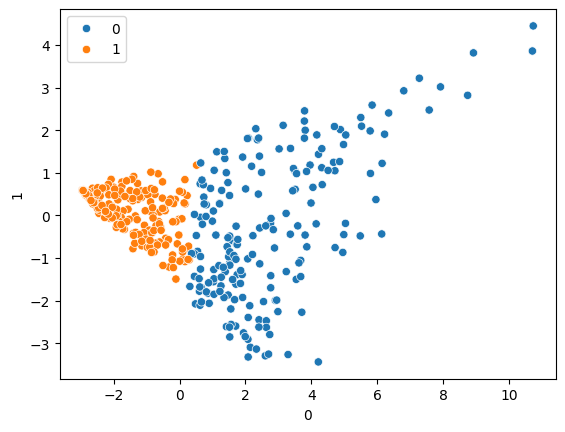

In [ ]:
sns.scatterplot(x=pca_df.iloc[:,0], y=pca_df.iloc[:,1], hue=model.labels_)

In [ ]:
from scipy.spatial.distance import cdist

clusters_ = range(1,10)
distortion = []

for k in clusters_:
  model = KMeans(n_clusters=k, random_state=0)
  model.fit(pca_df)
  Y = model.predict(pca_df)
  distortion.append(
    sum(np.min(cdist(pca_df, model.cluster_centers_), axis = 1))/pca_df.shape[0]
  )


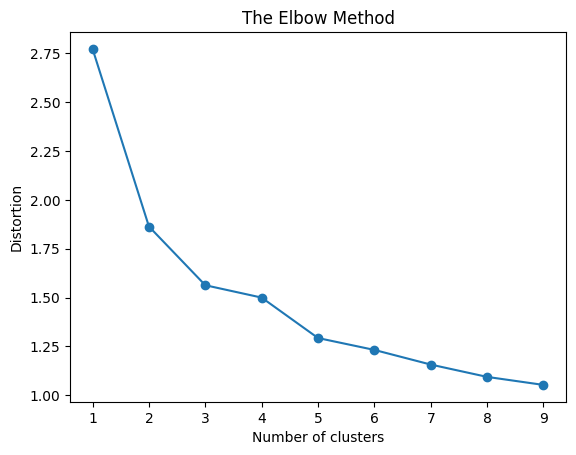

In [ ]:
plt.plot(clusters_, distortion, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

<Axes: xlabel='0', ylabel='1'>

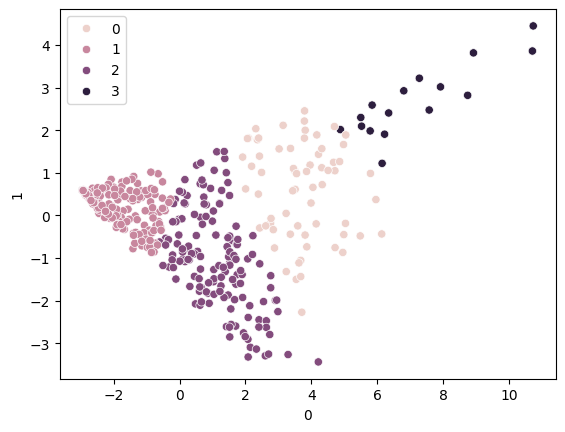

In [ ]:
model = KMeans(n_clusters=4, random_state=0)
model.fit(pca_df)
sns.scatterplot(x=pca_df.iloc[:,0], y=pca_df.iloc[:,1], hue=model.labels_)

In [ ]:
data_scaled_df.head(1)

Goals_Scored   Assists  Total_Points   Minutes  Goals_Conceded  Creativity  \
0     -0.552608 -0.647555     -1.122506 -1.232383       -1.202653   -0.780115   

   Influence    Threat     Bonus  Clean_Sheets  
0  -1.039325 -0.707638 -0.755435     -1.081123

In [ ]:
pca_df.head(1) # 2 transformations

0         1         2         3         4         5         6  \
0 -2.9166  0.569939 -0.041871  0.190663  0.003485  0.008158 -0.042314   

          7         8         9  
0  0.064757 -0.057486 -0.006269

In [ ]:
model_kmeans = model

In [ ]:
data_kmeans = data_scaled_df.copy()
data_kmeans['labels'] = model_kmeans.labels_
data_kmeans.head()

Goals_Scored   Assists  Total_Points   Minutes  Goals_Conceded  Creativity  \
0     -0.552608 -0.647555     -1.122506 -1.232383       -1.202653   -0.780115   
1      3.213401  0.461208      1.375560  0.539871        0.115663    0.443542   
2     -0.552608 -0.647555      1.414592  1.672585        1.120094   -0.780115   
3      0.895857  1.200384      1.082818  1.134662        0.743432    1.809706   
4     -0.552608  0.461208     -0.439441 -0.546229       -0.574884   -0.105790   

   Influence    Threat     Bonus  Clean_Sheets  labels  
0  -1.039325 -0.707638 -0.755435     -1.081123       1  
1   1.150596  1.799393  2.606688      0.513521       0  
2   1.523682 -0.701346  1.005677      1.424747       2  
3   0.741621  2.387618  0.525374      0.741328       0  
4  -0.459134 -0.465428 -0.275132     -0.625510       1

In [ ]:
cluster_kmeans = data_kmeans.groupby('labels').mean()
cluster_kmeans['count'] = data_kmeans.groupby('labels')['Goals_Scored'].count().values


In [ ]:
cluster_kmeans.style.highlight_max()

In [ ]:
cluster_kmeans.style.highlight_min(color='red')

<Axes: xlabel='labels', ylabel='Goals_Scored'>

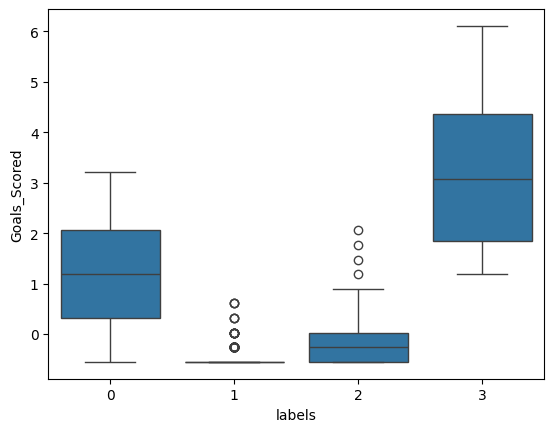

In [ ]:
sns.boxplot(x='labels', y='Goals_Scored', data=data_kmeans)

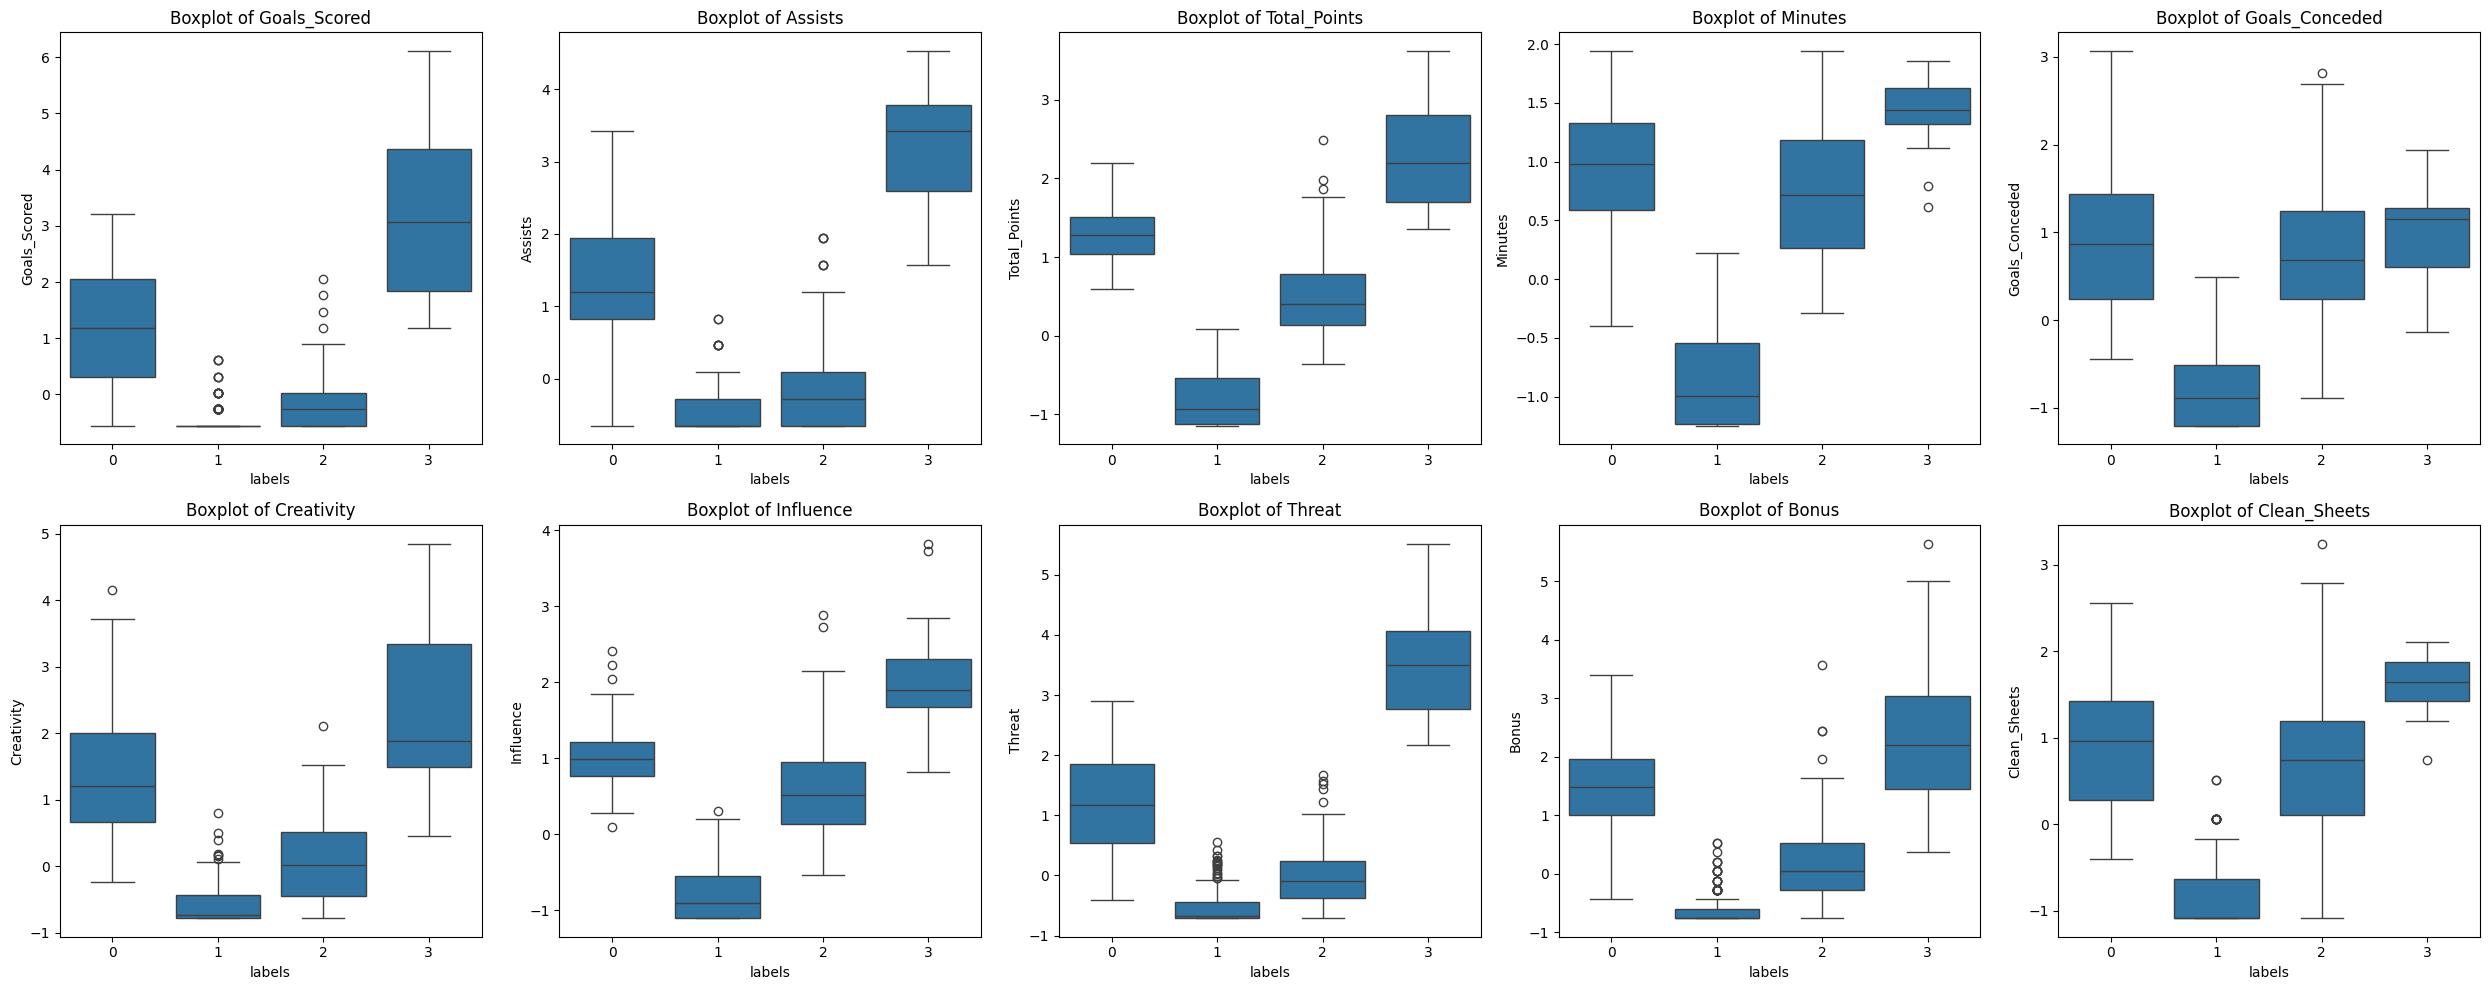

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(25, 10))

for i in range(2):
    for j in range(5):
        feature_index = 5*i + j
        feature = data_num.columns[feature_index]
        sns.boxplot(
            x='labels',
            y=feature,
            data=data_kmeans,
            ax=ax[i][j]
        )
        ax[i][j].set_title(f"Boxplot of {feature}")

plt.tight_layout()
plt.show()


In [ ]:
!pip uninstall numpy -y
!pip install numpy==1.26.4 # Install a compatible version of numpy

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

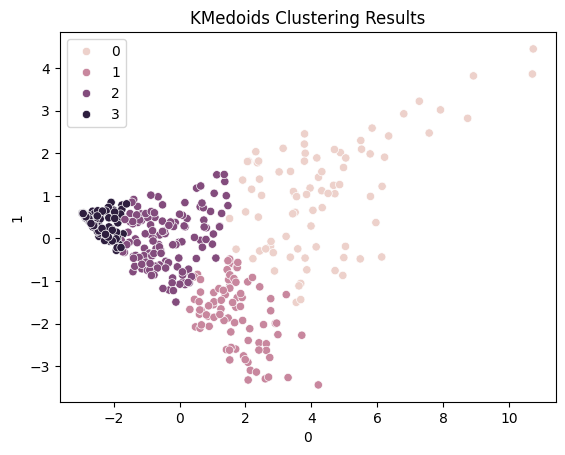

In [ ]:
model_kmedoids = KMedoids(n_clusters=4, random_state=0)
model_kmedoids.fit(pca_df)
sns.scatterplot(x=pca_df.iloc[:,0], y=pca_df.iloc[:,1], hue=model_kmedoids.labels_)
plt.title('KMedoids Clustering Results')
plt.show()

In [ ]:
model_kmedoids.predict(pca_df)

array([3, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 2, 3, 3, 2, 0, 2, 0,
       3, 1, 3, 3, 3, 2, 3, 2, 2, 0, 0, 3, 3, 1, 1, 1, 3, 0, 3, 3, 0, 3,
       3, 3, 2, 2, 1, 1, 3, 0, 3, 2, 1, 3, 2, 2, 1, 2, 3, 3, 1, 3, 2, 0,
       3, 3, 3, 3, 1, 3, 0, 1, 2, 0, 0, 3, 3, 1, 2, 2, 2, 1, 3, 2, 0, 3,
       1, 1, 0, 3, 0, 2, 2, 1, 2, 2, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2,
       3, 2, 1, 0, 3, 2, 1, 2, 1, 3, 3, 3, 2, 0, 2, 3, 3, 1, 2, 0, 2, 1,
       2, 0, 2, 1, 0, 3, 3, 0, 1, 0, 3, 0, 2, 3, 2, 2, 3, 3, 3, 2, 1, 2,
       1, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 1, 0, 1, 2, 2, 2, 3, 1, 3,
       3, 0, 3, 0, 0, 3, 3, 1, 3, 0, 1, 1, 3, 3, 3, 0, 3, 2, 2, 1, 3, 2,
       1, 3, 3, 2, 3, 1, 0, 3, 3, 3, 3, 1, 3, 3, 1, 1, 3, 0, 3, 3, 1, 0,
       0, 2, 0, 0, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 0, 3, 1, 0, 0, 1, 1, 0,
       2, 2, 2, 2, 3, 3, 1, 3, 3, 1, 1, 0, 3, 3, 1, 0, 3, 2, 2, 2, 3, 1,
       1, 2, 2, 2, 3, 0, 3, 2, 3, 3, 3, 0, 0, 2, 0, 3, 2, 2, 2, 0, 1, 3,
       2, 2, 0, 0, 0, 1, 0, 1, 3, 3, 2, 3, 2, 0, 0,

In [ ]:
pd.DataFrame(model_kmedoids.cluster_centers_)

0         1         2         3         4         5         6  \
0  3.510462  0.613016  0.517543  0.416560  0.191936 -0.405614 -0.116210   
1  1.672802 -1.977894 -0.210775  0.195068  0.267424  0.657495  0.063915   
2 -0.602559  0.081585  0.174035 -0.050390  0.372458 -0.167053  0.230252   
3 -2.879568  0.536520 -0.041019  0.160248 -0.023890  0.007384 -0.032287   

          7         8         9  
0 -0.279499  0.004610 -0.033056  
1  0.153208 -0.127187  0.002233  
2 -0.107574  0.052573 -0.026930  
3  0.029865 -0.025391 -0.016262

In [ ]:
pd.DataFrame(scaler.inverse_transform(pca.inverse_transform(model_kmedoids.cluster_centers_)))

0             1      2       3     4      5      6  \
0  6.000000e+00  5.000000e+00  122.0  2244.0  29.0  644.2  530.6   
1 -2.886580e-15  2.000000e+00  100.0  2683.0  35.0   84.3  610.4   
2  1.000000e+00  1.000000e+00   48.0  1108.0  14.0  210.6  170.6   
3  2.220446e-16  1.998401e-15    3.0    45.0   1.0    1.0   11.6   

              7             8             9  
0  5.100000e+02  1.300000e+01  1.000000e+01  
1  1.520000e+02  7.000000e+00  1.100000e+01  
2  2.350000e+02  3.000000e+00  5.000000e+00  
3  2.557954e-13  8.881784e-16 -8.881784e-16

In [ ]:
data[(data['Goals_Scored'] == 6) & (data['Total_Points'] == 122)]

Player_Name     Club    Position  Goals_Scored  Assists  \
179  Gylfi Sigurdsson  Everton  Midfielder             6        5   

     Total_Points  Minutes  Goals_Conceded  Creativity  Influence  Threat  \
179           122     2244              29       644.2      530.6     510   

     Bonus  Clean_Sheets  
179     13            10

In [ ]:
data_kmedoids = data_scaled_df.copy()
data_kmedoids['labels'] = model_kmedoids.labels_
data_kmedoids.head()

Goals_Scored   Assists  Total_Points   Minutes  Goals_Conceded  Creativity  \
0     -0.552608 -0.647555     -1.122506 -1.232383       -1.202653   -0.780115   
1      3.213401  0.461208      1.375560  0.539871        0.115663    0.443542   
2     -0.552608 -0.647555      1.414592  1.672585        1.120094   -0.780115   
3      0.895857  1.200384      1.082818  1.134662        0.743432    1.809706   
4     -0.552608  0.461208     -0.439441 -0.546229       -0.574884   -0.105790   

   Influence    Threat     Bonus  Clean_Sheets  labels  
0  -1.039325 -0.707638 -0.755435     -1.081123       3  
1   1.150596  1.799393  2.606688      0.513521       0  
2   1.523682 -0.701346  1.005677      1.424747       1  
3   0.741621  2.387618  0.525374      0.741328       0  
4  -0.459134 -0.465428 -0.275132     -0.625510       2

In [ ]:
profile_kmedoids = data_kmedoids.groupby('labels').mean()
profile_kmedoids['count'] = data_kmedoids.groupby('labels')['Goals_Scored'].count().values
profile_kmedoids

Goals_Scored   Assists  Total_Points   Minutes  Goals_Conceded  \
labels                                                                   
0           1.623622  1.642087      1.458384  1.039798        0.922576   
1          -0.242936 -0.243982      0.800394  1.213155        1.097003   
2          -0.164930 -0.071433     -0.145264 -0.062330       -0.011276   
3          -0.523808 -0.606490     -0.991029 -1.066263       -0.991561   

        Creativity  Influence    Threat     Bonus  Clean_Sheets  count  
labels                                                                  
0         1.619838   1.237526  1.637089  1.577746      1.021918     82  
1        -0.045353   1.051225 -0.184422  0.363432      1.181229     87  
2        -0.061769  -0.194504 -0.068760 -0.290435     -0.122996    136  
3        -0.704564  -0.973574 -0.636522 -0.710494     -0.993198    171

In [ ]:
profile_kmedoids.style.highlight_max()

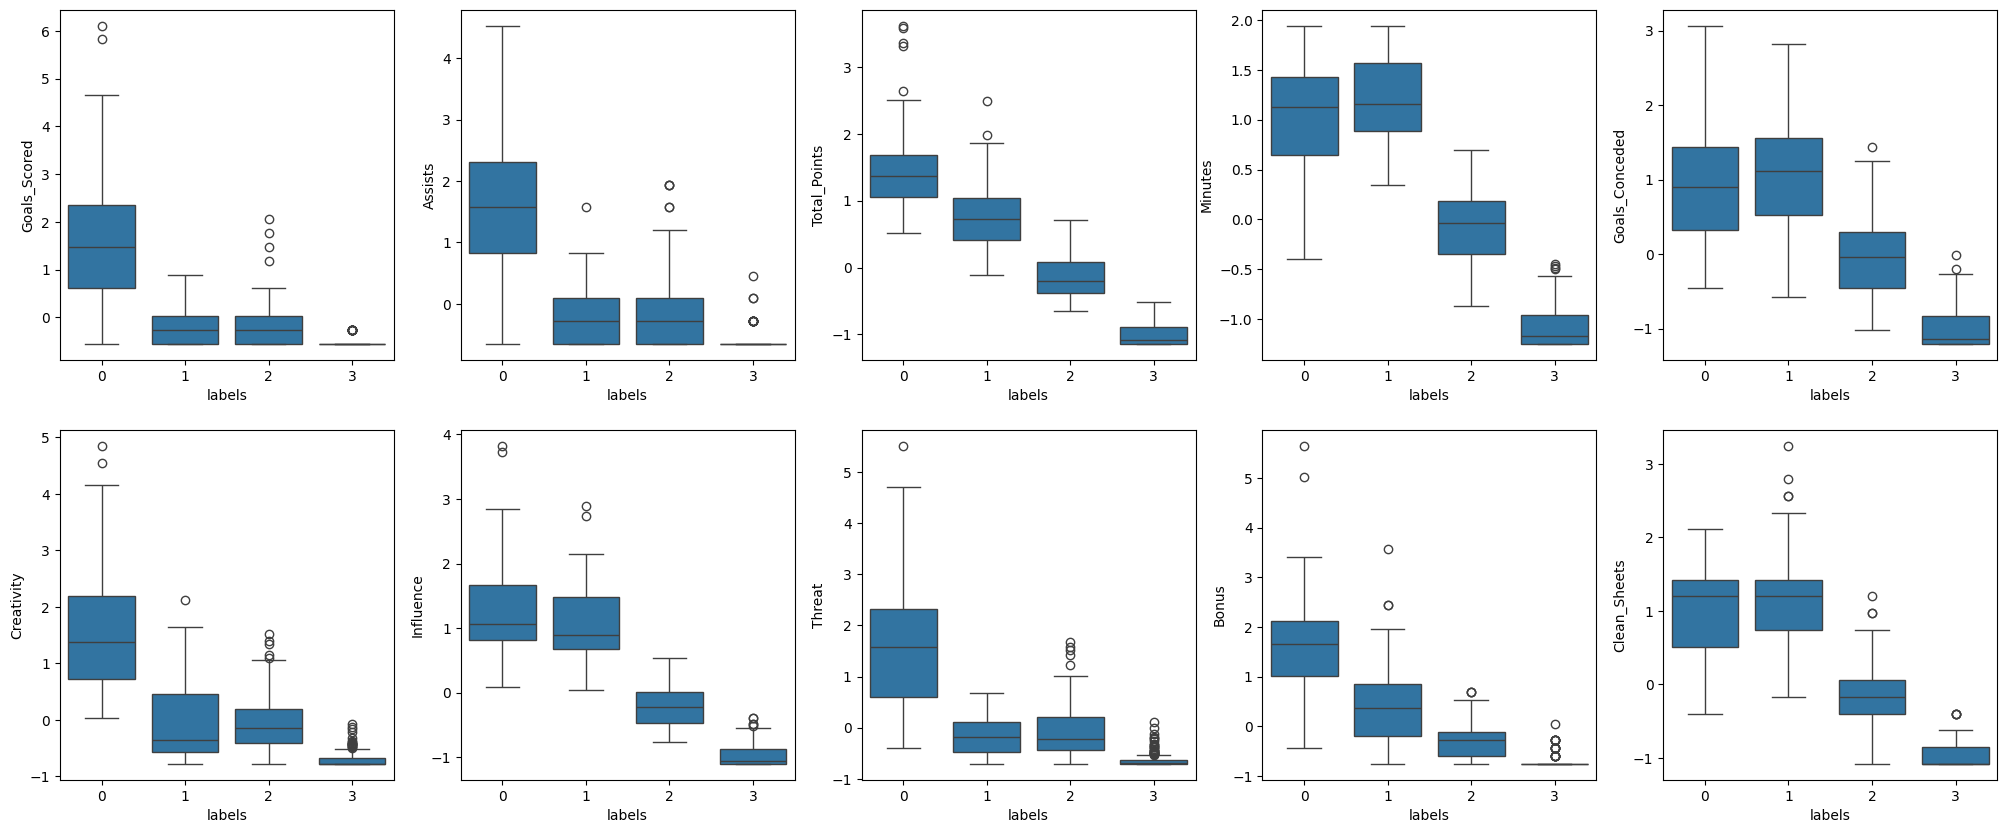

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(25, 10))

for i in range(2):
    for j in range(5):
        sns.boxplot(data=data_kmedoids, x='labels', y=data_num.columns[5*i + j], ax=ax[i][j])

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

model_Agg = AgglomerativeClustering(
    n_clusters=4,
    metric='euclidean',
    linkage='complete'
)

model_Agg.fit(pca_df)
model_Agg



AgglomerativeClustering(linkage='complete', n_clusters=4)

In [ ]:
# To see cluster labels
labels = model_Agg.labels_
print(labels)

[2 3 0 3 2 2 0 2 2 0 0 2 0 0 0 2 2 2 2 0 2 3 2 0 2 2 2 0 2 0 2 0 3 2 2 0 0
 0 2 3 2 2 0 2 2 2 0 2 0 0 2 1 2 0 0 2 2 0 0 0 2 2 0 2 0 0 2 2 2 2 0 2 3 0
 2 3 0 2 2 0 0 0 2 0 2 0 0 2 0 0 3 2 0 0 2 0 0 0 2 2 0 2 0 2 2 0 0 0 2 0 2
 0 0 0 2 0 0 0 0 2 2 2 0 0 0 2 2 0 0 3 0 0 0 0 0 0 3 2 2 0 0 0 2 0 0 2 0 0
 2 2 2 0 0 0 0 2 2 2 2 2 0 2 2 2 2 2 0 0 3 0 0 0 0 2 0 2 2 1 2 3 0 2 2 0 2
 0 0 0 2 2 2 3 2 0 2 0 2 2 0 2 2 0 2 0 3 2 2 2 2 0 2 2 0 0 2 0 2 2 0 1 3 2
 0 3 0 0 0 2 2 2 2 2 2 2 3 2 0 3 1 0 0 3 2 0 2 2 2 2 0 2 2 0 0 0 2 2 0 0 2
 0 2 0 2 0 0 0 2 0 2 1 2 0 2 2 2 3 3 0 0 2 2 0 0 0 0 2 0 0 3 3 0 0 3 0 2 2
 2 2 0 3 3 3 0 0 2 2 2 2 0 2 2 2 0 2 2 1 2 0 2 0 2 0 2 0 2 0 3 0 2 0 2 0 0
 2 0 2 0 2 3 0 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0 2 2 0 2 0 2 0 2 2 0 2 3 2 3
 2 2 0 2 0 0 0 2 0 2 2 2 0 2 0 0 2 0 2 0 2 2 2 0 2 2 2 2 2 0 2 0 0 1 2 1 0
 2 2 2 0 0 2 2 0 2 0 0 0 0 0 0 2 2 2 0 0 2 0 2 0 2 2 2 2 2 3 0 2 0 2 2 3 3
 2 2 0 2 3 0 0 0 0 0 2 0 2 2 2 0 0 2 0 2 2 2 3 0 0 0 0 2 0 2 0 0]


<Axes: xlabel='0', ylabel='1'>

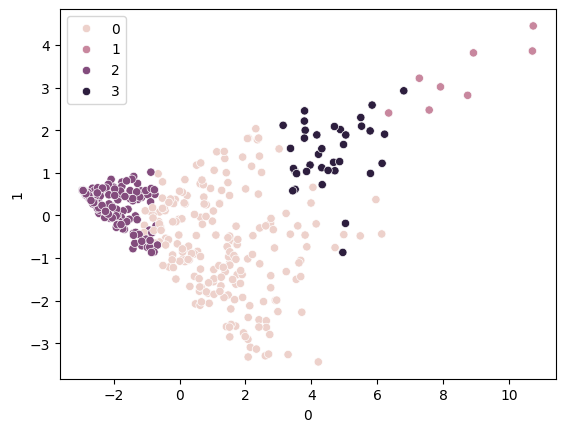

In [ ]:
# To see cluster labels
sns.scatterplot(data = pca_df, x = 0, y = 1, hue = model_Agg.labels_)

In [ ]:
data_agg = data_scaled_df.copy()
data_agg['labels'] = model_Agg.labels_
data_agg.head()

Goals_Scored   Assists  Total_Points   Minutes  Goals_Conceded  Creativity  \
0     -0.552608 -0.647555     -1.122506 -1.232383       -1.202653   -0.780115   
1      3.213401  0.461208      1.375560  0.539871        0.115663    0.443542   
2     -0.552608 -0.647555      1.414592  1.672585        1.120094   -0.780115   
3      0.895857  1.200384      1.082818  1.134662        0.743432    1.809706   
4     -0.552608  0.461208     -0.439441 -0.546229       -0.574884   -0.105790   

   Influence    Threat     Bonus  Clean_Sheets  labels  
0  -1.039325 -0.707638 -0.755435     -1.081123       2  
1   1.150596  1.799393  2.606688      0.513521       3  
2   1.523682 -0.701346  1.005677      1.424747       0  
3   0.741621  2.387618  0.525374      0.741328       3  
4  -0.459134 -0.465428 -0.275132     -0.625510       2

In [ ]:
profile_agg = data_agg.groupby('labels').mean()
profile_agg['count'] = data_agg.groupby('labels')['Goals_Scored'].count().values
profile_agg

Goals_Scored   Assists  Total_Points   Minutes  Goals_Conceded  \
labels                                                                   
0          -0.006329  0.151459      0.539433  0.712591        0.671089   
1           4.589442  3.279317      2.905137  1.605111        1.394743   
2          -0.475617 -0.544337     -0.860796 -0.895832       -0.816094   
3           1.950018  1.744500      1.515967  1.010825        0.807953   

        Creativity  Influence    Threat     Bonus  Clean_Sheets  count  
labels                                                                  
0         0.320806   0.586843  0.076662  0.305044      0.661053    210  
1         2.004162   2.621353  3.948614  3.467231      1.538650      8  
2        -0.630182  -0.846282 -0.568382 -0.659519     -0.863578    222  
3         1.569384   1.212964  2.180359  1.517111      1.127333     36

In [ ]:
profile_agg.style.highlight_max()


In [ ]:
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
from scipy.spatial.distance import pdist

In [ ]:
z = linkage(pca_df, method = 'complete', metric = 'euclidean')

In [ ]:
pd.DataFrame(z, columns = ['node1', 'node2', 'distance', 'group_size'])

node1  node2   distance  group_size
0     69.0  335.0   0.000000         2.0
1    396.0  476.0   0.000000         3.0
2     16.0   17.0   0.000000         2.0
3     26.0  478.0   0.000000         3.0
4     28.0  479.0   0.000000         4.0
5     38.0  480.0   0.000000         5.0
6     43.0  481.0   0.000000         6.0
7     52.0  482.0   0.000000         7.0
8     68.0  483.0   0.000000         8.0
9     84.0  484.0   0.000000         9.0
10   120.0  485.0   0.000000        10.0
11   125.0  486.0   0.000000        11.0
12   137.0  487.0   0.000000        12.0
13   142.0  488.0   0.000000        13.0
14   158.0  489.0   0.000000        14.0
15   161.0  490.0   0.000000        15.0
16   162.0  491.0   0.000000        16.0
17   163.0  492.0   0.000000        17.0
18   165.0  493.0   0.000000        18.0
19   196.0  494.0   0.000000        19.0
20   205.0  495.0   0.000000        20.0
21   207.0  496.0   0.000000        21.0
22   208.0  497.0   0.000000        22.0
23   210.0  498.0   0.000000        23.0
24   214.0  499.0   0.000000        24.0
25   232.0  500.0   0.000000        25.0
26   249.0  501.0   0.000000        26.0
27   295.0  502.0   0.000000        27.0
28   297.0  503.0   0.000000        28.0
29   306.0  504.0   0.000000        29.0
30   328.0  505.0   0.000000        30.0
31   346.0  506.0   0.000000        31.0
32   356.0  507.0   0.000000        32.0
33   364.0  508.0   0.000000        33.0
34   377.0  509.0   0.000000        34.0
35   394.0  510.0   0.000000        35.0
36   397.0  511.0   0.000000        36.0
37   409.0  512.0   0.000000        37.0
38   413.0  513.0   0.000000        38.0
39   415.0  514.0   0.000000        39.0
40   422.0  515.0   0.000000        40.0
41   423.0  516.0   0.000000        41.0
42   433.0  517.0   0.000000        42.0
43   435.0  518.0   0.000000        43.0
44   438.0  519.0   0.000000        44.0
45   444.0  520.0   0.000000        45.0
46   156.0  189.0   0.001195         2.0
47    78.0  342.0   0.001515         2.0
48    41.0  477.0   0.001990         4.0
49   247.0  322.0   0.006079         2.0
50   104.0  333.0   0.007143         2.0
51   523.0  524.0   0.007167         6.0
52    33.0  465.0   0.008048         2.0
53   525.0  527.0   0.009869         8.0
54   230.0  463.0   0.010739         2.0
55   522.0  529.0   0.011066        10.0
56   432.0  526.0   0.012553         3.0
57   211.0  366.0   0.018575         2.0
58   216.0  530.0   0.020166         3.0
59   521.0  531.0   0.022076        55.0
60   528.0  532.0   0.022494         5.0
61    71.0  188.0   0.026534         2.0
62   250.0  536.0   0.026603         6.0
63   190.0  307.0   0.031924         2.0
64   533.0  534.0   0.035801         5.0
65    24.0  246.0   0.037976         2.0
66    25.0   99.0   0.044117         2.0
67   538.0  540.0   0.044258        11.0
68   539.0  541.0   0.044650         4.0
69   537.0  543.0   0.047083        13.0
70     0.0  181.0   0.047508         2.0
71   235.0  330.0   0.048765         2.0
72    22.0  173.0   0.050842         2.0
73   108.0  155.0   0.060497         2.0
74   535.0  545.0   0.061452        68.0
75   373.0  379.0   0.064125         2.0
76    55.0  542.0   0.065197         3.0
77   121.0  145.0   0.068419         2.0
78   182.0  456.0   0.071404         2.0
79   547.0  552.0   0.078087         5.0
80   110.0  390.0   0.080494         2.0
81   138.0  294.0   0.081289         2.0
82   544.0  548.0   0.085824         6.0
83   176.0  551.0   0.090069         3.0
84   101.0  386.0   0.097052         2.0
85    77.0  310.0   0.100296         2.0
86   184.0  368.0   0.104697         2.0
87   550.0  555.0   0.105001        73.0
88   314.0  391.0   0.111794         2.0
89   546.0  558.0   0.112109         8.0
90   114.0  272.0   0.121812         2.0
91   554.0  565.0   0.124883        10.0
92    66.0   91.0   0.142097         2.0
93   556.0  564.0   0.143526         4.0
94   553.0  559.0   0.143562         5.0
95    50.0  429.0   0.155470         2.0
96   557.0  570.0   0.161936

In [ ]:
pca_df.iloc[[69,335], :]

0         1        2         3        4         5         6  \
69  -2.942648  0.588478 -0.03341  0.186024  0.00793  0.007681 -0.020615   
335 -2.942648  0.588478 -0.03341  0.186024  0.00793  0.007681 -0.020615   

            7         8         9  
69   0.017924 -0.043448 -0.011263  
335  0.017924 -0.043448 -0.011263